In [10]:
import pandas as pd
import numpy as np
import datetime


In [11]:
train = pd.read_csv('./output/train.csv')    
test = pd.read_csv('./output/test.csv')    
test2 = pd.read_csv('./output/test2.csv')

def within_measure(x, y):
    #  3750901.5068 ≤ 𝑥 ≤ 3770901.5068
    #  −19268905.6133 ≤ 𝑦 ≤ −19208905.6133
    if 3750901.5068 <= x and x <= 3770901.5068 and -19268905.6133 <= y and y <= -19208905.6133:
        return 1
    else:
        return 0

    
train = train.append(test[test.x_exit==test.x_exit])
columns=[#'hash', 'trajectory_id', 
         'time_entry', 'time_exit', 
    'vmax', 'vmin','vmean', 
    'x_entry', 'y_entry', 'first', 'last',
       'x_req', 'y_req', 'x_start', 'y_start', 'distance', 'time_start',
       'time_delta', 'time_total', 'city_start', 'city_now', 'city_was',
       'x_dir', 'y_dir', 'len',
         'distance_to_city', 'speed',
    #'x_exit', 'y_exit', 
        ]
x_train, x_test = pd.DataFrame(), pd.DataFrame()
x_train = train[columns]
x_test = test2[columns]


y_train=pd.DataFrame()
#y_train=train[['x_exit','y_exit']]
y_train=[within_measure(x, y) for x,y in zip(train.x_exit.values,train.y_exit.values)]
y_train=pd.DataFrame({'y':y_train})

In [12]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983684 entries, 0 to 202935
Data columns (total 25 columns):
time_entry          983684 non-null int64
time_exit           983684 non-null int64
vmax                311474 non-null float64
vmin                311474 non-null float64
vmean               328137 non-null float64
x_entry             983684 non-null float64
y_entry             983684 non-null float64
first               983684 non-null bool
last                983684 non-null bool
x_req               983684 non-null float64
y_req               983684 non-null float64
x_start             983684 non-null float64
y_start             983684 non-null float64
distance            983684 non-null float64
time_start          983684 non-null int64
time_delta          983684 non-null int64
time_total          983684 non-null int64
city_start          983684 non-null bool
city_now            983684 non-null bool
city_was            983684 non-null bool
x_dir               983684 non-nul

In [13]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983684 entries, 0 to 983683
Data columns (total 1 columns):
y    983684 non-null int64
dtypes: int64(1)
memory usage: 7.5 MB


In [14]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import matplotlib.patches as patches

new_columns=['cluster_V','cluster_times','cluster_location','cluster_road','cluster_connection','cluster_acceleration']
metric_columns=[['vmax', 'vmin','vmean'],
                ['time_entry', 'time_exit', 'time_start','time_delta', 'time_total'],
                ['len','distance_to_city','distance'],
                ['x_entry','y_entry'],
                ['x_start','y_start','x_entry','y_entry'],
                ['vmean','speed']
               ]

model_columns=[ MiniBatchKMeans(n_clusters=24,max_iter=100, batch_size=1000,reassignment_ratio=0.2, verbose=True,random_state=5315),
                MiniBatchKMeans(n_clusters=128,max_iter=100, batch_size=1000,reassignment_ratio=0.2, verbose=True,random_state=5315),
                MiniBatchKMeans(n_clusters=64,max_iter=100, batch_size=1000,reassignment_ratio=0.2, verbose=True,random_state=5315),
                DBSCAN(eps=190,min_samples=40,n_jobs=-1),
                MiniBatchKMeans(n_clusters=10,max_iter=100, batch_size=1000,reassignment_ratio=0.2, verbose=True,random_state=5315),
                MiniBatchKMeans(n_clusters=24,max_iter=100, batch_size=1000,reassignment_ratio=0.2, verbose=True,random_state=5315),
              ]
for new,metric,model in zip(new_columns,metric_columns,model_columns):
    data=train[metric]
    trainend=np.shape(data)[0]
    data=data.append(test2[metric])

    for col in metric:
        mode = data[col].mode()[0]
        data[col].fillna(mode, inplace=True)
    c = model.fit_predict(data)

    labels=list(np.unique(c))
    clusters=len(labels)
    train_c=c[:trainend]
    test2_c=c[trainend:]
    x_train[new]=train_c
    x_test[new]=test2_c




Init 1/3 with method: k-means++
Inertia for init 1/3: 3864.058610
Init 2/3 with method: k-means++
Inertia for init 2/3: 3307.352443
Init 3/3 with method: k-means++
Inertia for init 3/3: 3643.386430
Minibatch iteration 1/101800: mean batch inertia: 0.288822, ewa inertia: 0.288822 
Minibatch iteration 2/101800: mean batch inertia: 0.320353, ewa inertia: 0.288884 
Minibatch iteration 3/101800: mean batch inertia: 0.232626, ewa inertia: 0.288774 
Minibatch iteration 4/101800: mean batch inertia: 0.267864, ewa inertia: 0.288733 
Minibatch iteration 5/101800: mean batch inertia: 0.283730, ewa inertia: 0.288723 
Minibatch iteration 6/101800: mean batch inertia: 0.157368, ewa inertia: 0.288465 
Minibatch iteration 7/101800: mean batch inertia: 0.294527, ewa inertia: 0.288476 
Minibatch iteration 8/101800: mean batch inertia: 31.151175, ewa inertia: 0.349158 
Minibatch iteration 9/101800: mean batch inertia: 0.225219, ewa inertia: 0.348914 
Minibatch iteration 10/101800: mean batch inertia: 2.2

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Init 1/3 with method: k-means++
Inertia for init 1/3: 15113367558.747671
Init 2/3 with method: k-means++
Inertia for init 2/3: 14932931687.611032
Init 3/3 with method: k-means++
Inertia for init 3/3: 15110702084.856085
Minibatch iteration 1/101800: mean batch inertia: 5188261.759303, ewa inertia: 5188261.759303 
Minibatch iteration 2/101800: mean batch inertia: 5239104.501485, ewa inertia: 5188361.725371 
Minibatch iteration 3/101800: mean batch inertia: 5584537.936597, ewa inertia: 5189140.679777 
Minibatch iteration 4/101800: mean batch inertia: 5121478.263625, ewa inertia: 5189007.643175 
Minibatch iteration 5/101800: mean batch inertia: 5467917.923930, ewa inertia: 5189556.031458 
Minibatch iteration 6/101800: mean batch inertia: 5270869.528876, ewa inertia: 5189715.908566 
Minibatch iteration 7/101800: mean batch inertia: 5172380.955606, ewa inertia: 5189681.824899 
Minibatch iteration 8/101800: mean batch inertia: 5011397.000575, ewa inertia: 5189331.284545 
Minibatch iteration 9

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Init 1/3 with method: k-means++
Inertia for init 1/3: 1565032385539.371826
Init 2/3 with method: k-means++
Inertia for init 2/3: 1521017843097.616699
Init 3/3 with method: k-means++
Inertia for init 3/3: 1540768357932.759521
Minibatch iteration 1/101800: mean batch inertia: 598637643.141332, ewa inertia: 598637643.141332 
Minibatch iteration 2/101800: mean batch inertia: 558749943.284858, ewa inertia: 598559216.676809 
Minibatch iteration 3/101800: mean batch inertia: 555895540.240013, ewa inertia: 598475332.138002 
Minibatch iteration 4/101800: mean batch inertia: 530979868.912364, ewa inertia: 598342623.795050 
Minibatch iteration 5/101800: mean batch inertia: 569743781.530700, ewa inertia: 598286393.275458 
Minibatch iteration 6/101800: mean batch inertia: 543432279.298372, ewa inertia: 598178540.121748 
Minibatch iteration 7/101800: mean batch inertia: 503779171.768984, ewa inertia: 597992933.813543 
Minibatch iteration 8/101800: mean batch inertia: 572813711.897166, ewa inertia: 5

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Init 1/3 with method: k-means++
Inertia for init 1/3: 4729236367343.250000
Init 2/3 with method: k-means++
Inertia for init 2/3: 3759479024173.125000
Init 3/3 with method: k-means++
Inertia for init 3/3: 3813478122437.250000
Minibatch iteration 1/101800: mean batch inertia: 1344343963.379750, ewa inertia: 1344343963.379750 
Minibatch iteration 2/101800: mean batch inertia: 1214052994.321250, ewa inertia: 1344087787.663945 
Minibatch iteration 3/101800: mean batch inertia: 1263632410.387250, ewa inertia: 1343929597.775473 
Minibatch iteration 4/101800: mean batch inertia: 1198142562.691125, ewa inertia: 1343642953.978611 
Minibatch iteration 5/101800: mean batch inertia: 1193017539.030750, ewa inertia: 1343346797.047923 
Minibatch iteration 6/101800: mean batch inertia: 1205904608.759750, ewa inertia: 1343076560.735913 
Minibatch iteration 7/101800: mean batch inertia: 1239913617.495250, ewa inertia: 1342873723.647355 
Minibatch iteration 8/101800: mean batch inertia: 1205056514.505375,

Minibatch iteration 146/101800: mean batch inertia: 1145138238.019125, ewa inertia: 1304045401.554087 
Minibatch iteration 147/101800: mean batch inertia: 1226708680.761250, ewa inertia: 1303893343.510845 
Minibatch iteration 148/101800: mean batch inertia: 1181050060.824375, ewa inertia: 1303651811.299507 
Minibatch iteration 149/101800: mean batch inertia: 1188545592.608875, ewa inertia: 1303425491.561618 
Minibatch iteration 150/101800: mean batch inertia: 1208368389.954125, ewa inertia: 1303238592.030340 
Minibatch iteration 151/101800: mean batch inertia: 1151903459.599875, ewa inertia: 1302941039.666144 
Minibatch iteration 152/101800: mean batch inertia: 1111481990.021125, ewa inertia: 1302564596.391183 
Minibatch iteration 153/101800: mean batch inertia: 1151556729.203750, ewa inertia: 1302267687.489910 
Minibatch iteration 154/101800: mean batch inertia: 1145267581.673750, ewa inertia: 1301958996.758852 
Minibatch iteration 155/101800: mean batch inertia: 1137089260.840750, ew

Minibatch iteration 307/101800: mean batch inertia: 1159506941.242375, ewa inertia: 1268458264.909272 
Minibatch iteration 308/101800: mean batch inertia: 1195230684.520625, ewa inertia: 1268314286.182594 
Minibatch iteration 309/101800: mean batch inertia: 1145291242.826875, ewa inertia: 1268072400.529122 
Minibatch iteration 310/101800: mean batch inertia: 1201017465.199250, ewa inertia: 1267940558.344046 
Minibatch iteration 311/101800: mean batch inertia: 1221957130.661875, ewa inertia: 1267850146.571175 
Minibatch iteration 312/101800: mean batch inertia: 1207497894.091750, ewa inertia: 1267731483.078294 
Minibatch iteration 313/101800: mean batch inertia: 1206617173.904250, ewa inertia: 1267611321.243504 
Minibatch iteration 314/101800: mean batch inertia: 1156266750.545125, ewa inertia: 1267392397.588965 
Minibatch iteration 315/101800: mean batch inertia: 1149951196.316750, ewa inertia: 1267161486.851112 
Minibatch iteration 316/101800: mean batch inertia: 1204737568.321500, ew

Minibatch iteration 389/101800: mean batch inertia: 1099828663.346750, ewa inertia: 1254402691.171986 
Minibatch iteration 390/101800: mean batch inertia: 1159076085.362500, ewa inertia: 1254215261.746486 
Minibatch iteration 391/101800: mean batch inertia: 1227731613.239250, ewa inertia: 1254163190.082098 
Minibatch iteration 392/101800: mean batch inertia: 1197956284.725750, ewa inertia: 1254052677.094768 
Minibatch iteration 393/101800: mean batch inertia: 1132419578.135875, ewa inertia: 1253813524.324499 
Minibatch iteration 394/101800: mean batch inertia: 1143916752.112750, ewa inertia: 1253597447.304814 
Minibatch iteration 395/101800: mean batch inertia: 1160347280.300375, ewa inertia: 1253414100.535242 
Minibatch iteration 396/101800: mean batch inertia: 1245115100.016500, ewa inertia: 1253397783.192499 
Minibatch iteration 397/101800: mean batch inertia: 1258461138.903625, ewa inertia: 1253407738.669713 
Minibatch iteration 398/101800: mean batch inertia: 1165708522.496250, ew

Minibatch iteration 469/101800: mean batch inertia: 1199559510.947250, ewa inertia: 1242645145.212282 
Minibatch iteration 470/101800: mean batch inertia: 1167462936.733000, ewa inertia: 1242497323.331670 
Minibatch iteration 471/101800: mean batch inertia: 1157655908.270250, ewa inertia: 1242330509.696079 
Minibatch iteration 472/101800: mean batch inertia: 1213751815.076000, ewa inertia: 1242274318.790416 
Minibatch iteration 473/101800: mean batch inertia: 1168332623.442125, ewa inertia: 1242128935.983990 
Minibatch iteration 474/101800: mean batch inertia: 1176344084.773875, ewa inertia: 1241999591.015036 
Minibatch iteration 475/101800: mean batch inertia: 1132104088.866500, ewa inertia: 1241783516.492526 
Minibatch iteration 476/101800: mean batch inertia: 1153907113.968125, ewa inertia: 1241610735.520201 
Minibatch iteration 477/101800: mean batch inertia: 1161795624.734875, ewa inertia: 1241453804.511972 
Minibatch iteration 478/101800: mean batch inertia: 1209573597.749875, ew

Minibatch iteration 549/101800: mean batch inertia: 1220741742.331625, ewa inertia: 1233495920.023727 
Minibatch iteration 550/101800: mean batch inertia: 1189769880.740750, ewa inertia: 1233409946.686561 
Minibatch iteration 551/101800: mean batch inertia: 1170897899.106000, ewa inertia: 1233287036.644129 
Minibatch iteration 552/101800: mean batch inertia: 1210979823.467250, ewa inertia: 1233243176.610357 
Minibatch iteration 553/101800: mean batch inertia: 1182654959.620125, ewa inertia: 1233143710.985130 
Minibatch iteration 554/101800: mean batch inertia: 1201445853.151500, ewa inertia: 1233081387.237915 
Minibatch iteration 555/101800: mean batch inertia: 1186665208.908500, ewa inertia: 1232990124.598652 
Minibatch iteration 556/101800: mean batch inertia: 1156940246.653625, ewa inertia: 1232840596.722236 
Minibatch iteration 557/101800: mean batch inertia: 1116674232.236500, ewa inertia: 1232612192.545111 
Minibatch iteration 558/101800: mean batch inertia: 1204439367.601125, ew

Minibatch iteration 629/101800: mean batch inertia: 1242041256.781500, ewa inertia: 1225475389.534056 
Minibatch iteration 630/101800: mean batch inertia: 1169019994.997375, ewa inertia: 1225364387.971853 
Minibatch iteration 631/101800: mean batch inertia: 1173367974.430875, ewa inertia: 1225262153.576373 
Minibatch iteration 632/101800: mean batch inertia: 1172150744.618500, ewa inertia: 1225157726.897337 
Minibatch iteration 633/101800: mean batch inertia: 1168233154.471875, ewa inertia: 1225045802.846166 
Minibatch iteration 634/101800: mean batch inertia: 1169658837.577875, ewa inertia: 1224936902.010011 
Minibatch iteration 635/101800: mean batch inertia: 1162226983.340125, ewa inertia: 1224813602.917070 
Minibatch iteration 636/101800: mean batch inertia: 1184175386.958500, ewa inertia: 1224733700.801540 
Minibatch iteration 637/101800: mean batch inertia: 1085417945.319625, ewa inertia: 1224459780.716046 
Minibatch iteration 638/101800: mean batch inertia: 1210896253.059500, ew

Minibatch iteration 709/101800: mean batch inertia: 1152827422.198375, ewa inertia: 1217277409.843356 
Minibatch iteration 710/101800: mean batch inertia: 1253893059.807500, ewa inertia: 1217349402.863340 
Minibatch iteration 711/101800: mean batch inertia: 1126195738.527125, ewa inertia: 1217170178.198896 
Minibatch iteration 712/101800: mean batch inertia: 1201004383.213625, ewa inertia: 1217138393.309031 
Minibatch iteration 713/101800: mean batch inertia: 1120063584.352375, ewa inertia: 1216947526.598538 
Minibatch iteration 714/101800: mean batch inertia: 1138619194.970250, ewa inertia: 1216793518.868243 
Minibatch iteration 715/101800: mean batch inertia: 1157576437.343125, ewa inertia: 1216677087.327690 
Minibatch iteration 716/101800: mean batch inertia: 1143155704.846000, ewa inertia: 1216532530.932720 
Minibatch iteration 717/101800: mean batch inertia: 1130275499.735625, ewa inertia: 1216362933.938624 
Minibatch iteration 718/101800: mean batch inertia: 1109583550.173000, ew

Minibatch iteration 871/101800: mean batch inertia: 1212633326.737250, ewa inertia: 1204417236.191588 
Minibatch iteration 872/101800: mean batch inertia: 1075781356.401125, ewa inertia: 1204164314.681973 
Minibatch iteration 873/101800: mean batch inertia: 1226059245.334250, ewa inertia: 1204207364.093401 
Minibatch iteration 874/101800: mean batch inertia: 1235033717.982125, ewa inertia: 1204267974.305530 
Minibatch iteration 875/101800: mean batch inertia: 1155056427.171125, ewa inertia: 1204171215.463346 
Minibatch iteration 876/101800: mean batch inertia: 1175619569.819750, ewa inertia: 1204115077.740885 
Minibatch iteration 877/101800: mean batch inertia: 1201971265.294250, ewa inertia: 1204110862.616138 
Minibatch iteration 878/101800: mean batch inertia: 1106644968.499875, ewa inertia: 1203919226.961171 
Minibatch iteration 879/101800: mean batch inertia: 1144302422.860750, ewa inertia: 1203802009.493415 
Minibatch iteration 880/101800: mean batch inertia: 1123615528.885250, ew

Minibatch iteration 953/101800: mean batch inertia: 1144759784.278000, ewa inertia: 1198635820.857798 
Minibatch iteration 954/101800: mean batch inertia: 1108456218.546000, ewa inertia: 1198458511.376257 
Minibatch iteration 955/101800: mean batch inertia: 1141790419.443250, ewa inertia: 1198347091.612331 
Minibatch iteration 956/101800: mean batch inertia: 1161662706.803000, ewa inertia: 1198274963.447153 
Minibatch iteration 957/101800: mean batch inertia: 1096247161.270125, ewa inertia: 1198074358.252153 
Minibatch iteration 958/101800: mean batch inertia: 1133247360.465375, ewa inertia: 1197946896.597047 
Minibatch iteration 959/101800: mean batch inertia: 1148088514.863375, ewa inertia: 1197848865.960528 
Minibatch iteration 960/101800: mean batch inertia: 1224299462.970125, ewa inertia: 1197900872.639666 
Minibatch iteration 961/101800: mean batch inertia: 1159792986.195375, ewa inertia: 1197825945.611659 
Minibatch iteration 962/101800: mean batch inertia: 1181508403.464000, ew

In [15]:
x_train.head()

time_entry  time_exit  vmax  vmin  vmean       x_entry       y_entry  \
0       25471      25712   NaN   NaN    NaN  3.751014e+06 -1.909398e+07   
1       26434      26742   NaN   NaN    NaN  3.743937e+06 -1.932247e+07   
2       28412      29005   NaN   NaN    NaN  3.744868e+06 -1.929356e+07   
3       29870      31043   NaN   NaN    NaN  3.744880e+06 -1.929229e+07   
4       52689      52689   NaN   NaN    NaN  3.744909e+06 -1.928558e+07   

   first   last         x_req          ...                  y_dir  len  \
0   True  False  3.751014e+06          ...          -42359.276973    1   
1  False  False  3.751014e+06          ...          -42359.276973    2   
2  False  False  3.743937e+06          ...            2803.848719    3   
3  False  False  3.744868e+06          ...             723.769955    4   
4  False  False  3.744880e+06          ...            1803.169939    5   

   distance_to_city       speed  cluster_V  cluster_times  cluster_location  \
0     434887.327822         NaN          3             48                 5   
1     251259.147958  179.855597          3             79                60   
2     164759.949137   72.867591          3              4                60   
3     160951.840984   46.444595          3             62                60   
4     140948.372163    9.754358          3             74                36   

   cluster_road  cluster_connection  cluster_acceleration  
0            -1                   5                     0  
1            -1                   6                    23  
2             0                   6                    23  
3             0                   6                    23  
4             1                   6                    12  

[5 rows x 31 columns]

In [16]:
def plot_clusters(col):
    data=train[['x_entry','y_entry']]
    data['c']=x_train[col]

    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(16)
    
    labels=list(np.unique(data['c'].values))
    
    # Plot
    for c in labels:
        ax.scatter(data[data.c==c].x_entry.values,data[data.c==c].y_entry.values,s=.05, alpha=0.5,
                   #label=str('c'+str(c))
                  )

    # Create a Rectangle patch
    rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)    

    ax.set(xlabel='x', ylabel='y',
           title=col)

    plt.show()


In [17]:
def plotmap(ycity,title):
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(16)

    df=test2[['x_entry','y_entry']]
    df['sqrt']=city_sqrt
    df['target']=ycity
    df=df[df.sqrt==0]
    leg=['Outside','City']
    # Plot
    for data in [df[df.target==1]]:
        ax.scatter(data.x_entry.values, data.y_entry.values,c='r',s=10, alpha=0.5,label=leg.pop(0))

    # Create a Rectangle patch
    rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)    

    ax.set(xlabel='x', ylabel='y',
           title=title)
    ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
    plt.show()
city_sqrt = [within_measure(x, y) for x,y in zip(test2.x_entry.values,test2.y_entry.values)]

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


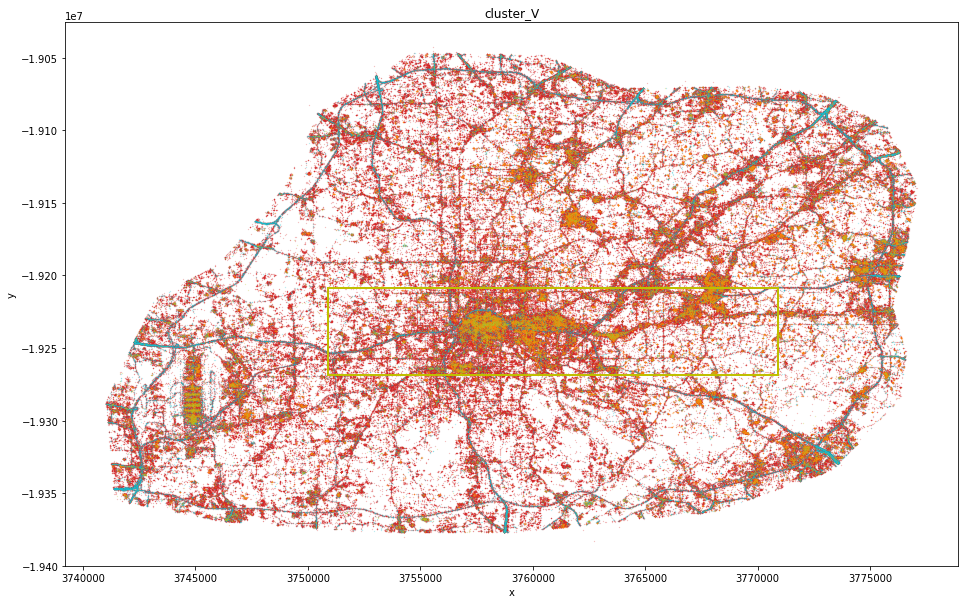

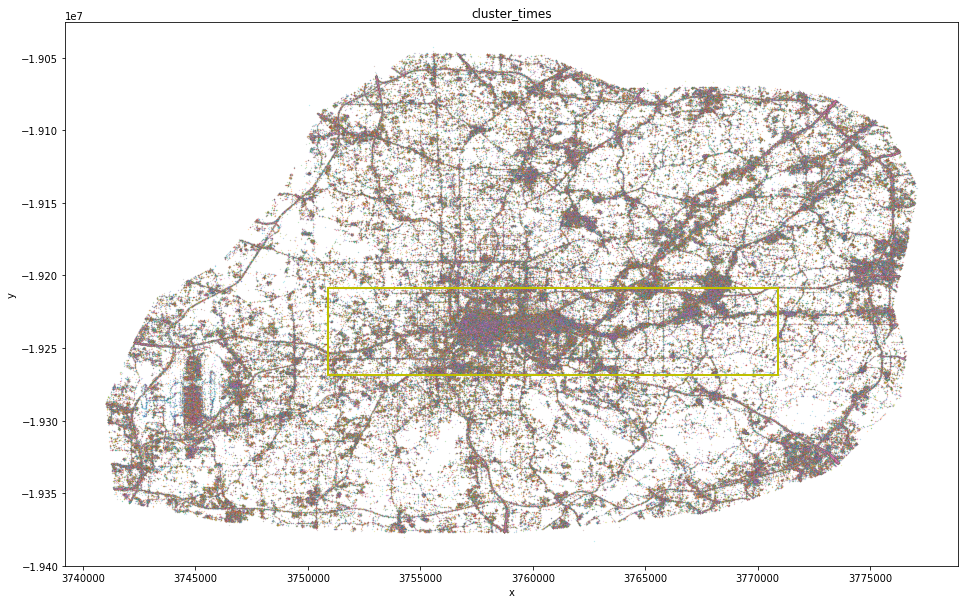

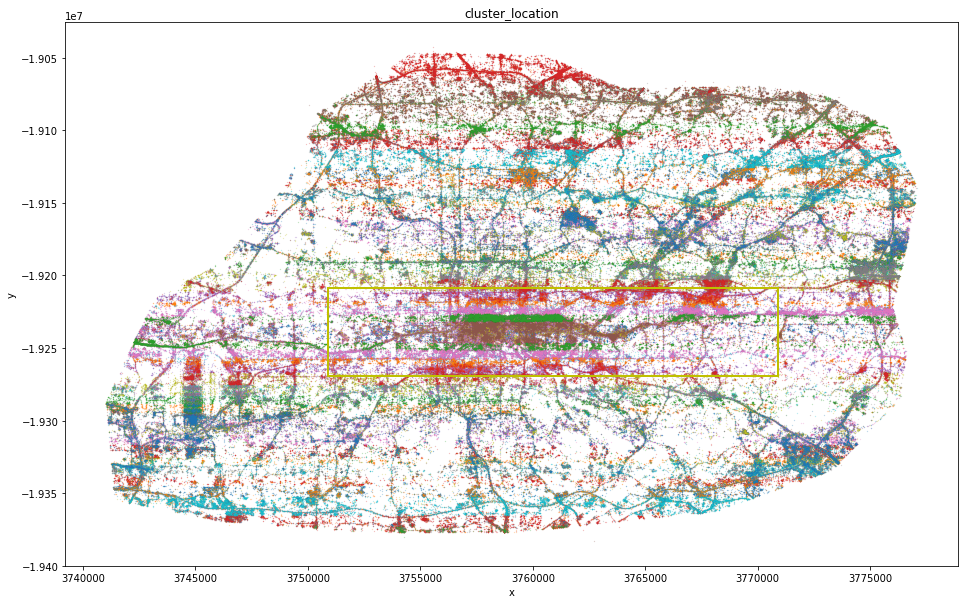

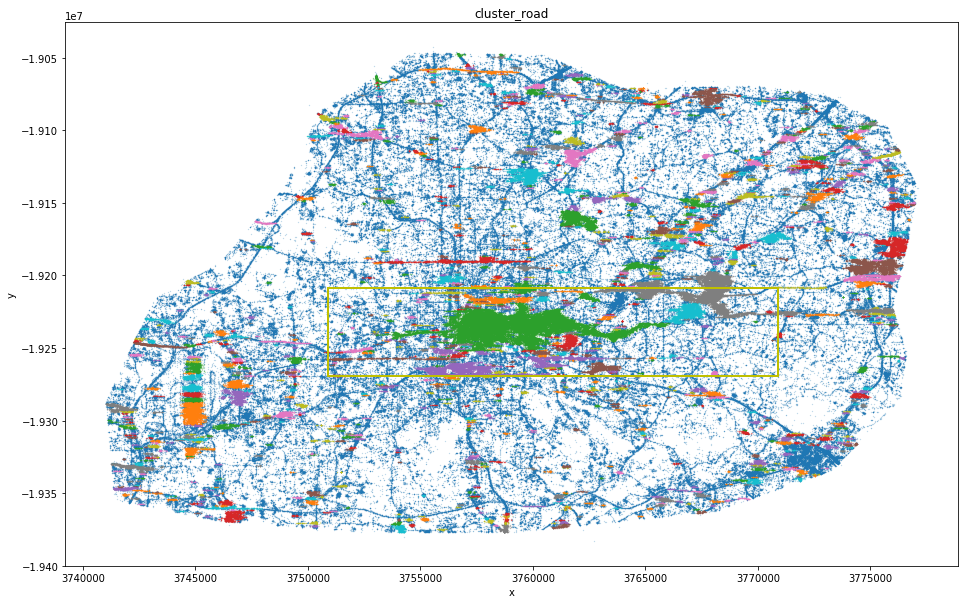

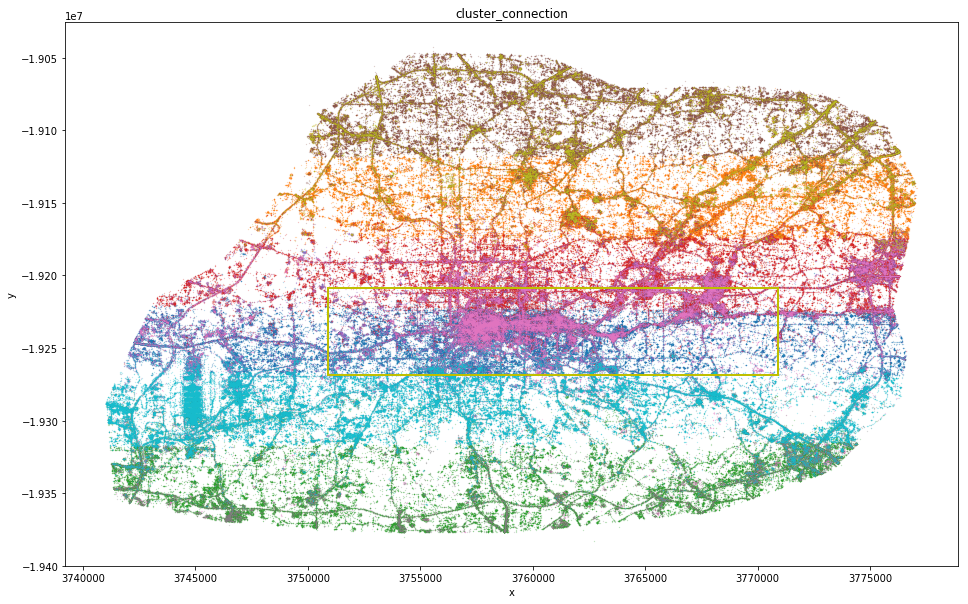

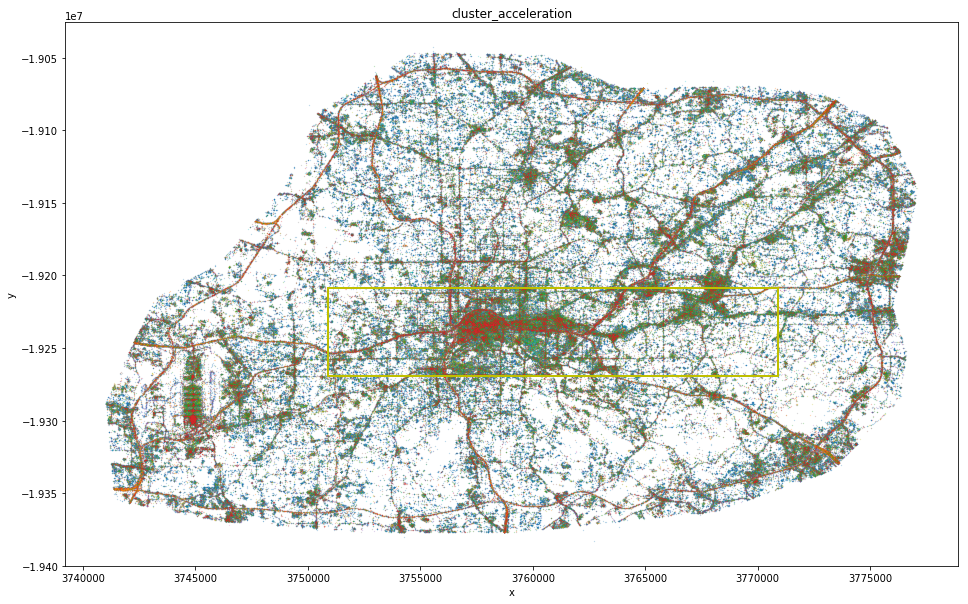

In [18]:
for col in new_columns:
    plot_clusters(col)

In [19]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983684 entries, 0 to 202935
Data columns (total 31 columns):
time_entry              983684 non-null int64
time_exit               983684 non-null int64
vmax                    311474 non-null float64
vmin                    311474 non-null float64
vmean                   328137 non-null float64
x_entry                 983684 non-null float64
y_entry                 983684 non-null float64
first                   983684 non-null bool
last                    983684 non-null bool
x_req                   983684 non-null float64
y_req                   983684 non-null float64
x_start                 983684 non-null float64
y_start                 983684 non-null float64
distance                983684 non-null float64
time_start              983684 non-null int64
time_delta              983684 non-null int64
time_total              983684 non-null int64
city_start              983684 non-null bool
city_now                983684 non-null bool

D:\Anaconda\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda\lib\site-packages\lightgbm\basic.py:721: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[1]	valid's binary_logloss: 0.602224	valid's f1: 0
[2]	valid's binary_logloss: 0.594269	valid's f1: 0
[3]	valid's binary_logloss: 0.586528	valid's f1: 0
[4]	valid's binary_logloss: 0.578986	valid's f1: 0
[5]	valid's binary_logloss: 0.571634	valid's f1: 0
[6]	valid's binary_logloss: 0.564466	valid's f1: 0
[7]	valid's binary_logloss: 0.557472	valid's f1: 0
[8]	valid's binary_logloss: 0.550646	valid's f1: 0
[9]	valid's binary_logloss: 0.543986	valid's f1: 0
[10]	valid's binary_logloss: 0.537463	valid's f1: 0
[11]	valid's binary_logloss: 0.531093	valid's f1: 0
[12]	valid's binary_logloss: 0.524864	valid's f1: 0
[13]	valid's binary_logloss: 0.518784	valid's f1: 0
[14]	valid's binary_logloss: 0.512836	valid's f1: 0
[15]	valid's binary_logloss: 0.506985	valid's f1: 0
[16]	valid's binary_logloss: 0.501289	valid's f1: 0
[17]	valid's binary_logloss: 0.495689	valid's f1: 0
[18]	valid's binary_logloss: 0.490199	valid's f1: 0
[19]	valid's binary_logloss: 0.484826	valid's f1: 0
[20]	valid's binary_l

[144]	valid's binary_logloss: 0.196245	valid's f1: 0.915031
[145]	valid's binary_logloss: 0.195346	valid's f1: 0.915022
[146]	valid's binary_logloss: 0.19446	valid's f1: 0.91519
[147]	valid's binary_logloss: 0.193582	valid's f1: 0.915223
[148]	valid's binary_logloss: 0.192709	valid's f1: 0.915269
[149]	valid's binary_logloss: 0.191853	valid's f1: 0.915318
[150]	valid's binary_logloss: 0.191006	valid's f1: 0.915375
[151]	valid's binary_logloss: 0.190171	valid's f1: 0.915438
[152]	valid's binary_logloss: 0.189352	valid's f1: 0.915456
[153]	valid's binary_logloss: 0.188534	valid's f1: 0.915556
[154]	valid's binary_logloss: 0.187732	valid's f1: 0.915554
[155]	valid's binary_logloss: 0.186933	valid's f1: 0.91558
[156]	valid's binary_logloss: 0.186142	valid's f1: 0.915601
[157]	valid's binary_logloss: 0.185356	valid's f1: 0.915759
[158]	valid's binary_logloss: 0.184583	valid's f1: 0.915793
[159]	valid's binary_logloss: 0.183826	valid's f1: 0.915751
[160]	valid's binary_logloss: 0.183074	vali

[282]	valid's binary_logloss: 0.133374	valid's f1: 0.916977
[283]	valid's binary_logloss: 0.133184	valid's f1: 0.916983
[284]	valid's binary_logloss: 0.132999	valid's f1: 0.916917
[285]	valid's binary_logloss: 0.132818	valid's f1: 0.916896
[286]	valid's binary_logloss: 0.132627	valid's f1: 0.916944
[287]	valid's binary_logloss: 0.132441	valid's f1: 0.916929
[288]	valid's binary_logloss: 0.132262	valid's f1: 0.91697
[289]	valid's binary_logloss: 0.132084	valid's f1: 0.917001
[290]	valid's binary_logloss: 0.131913	valid's f1: 0.916977
[291]	valid's binary_logloss: 0.131736	valid's f1: 0.916952
[292]	valid's binary_logloss: 0.131556	valid's f1: 0.916968
[293]	valid's binary_logloss: 0.131378	valid's f1: 0.917003
[294]	valid's binary_logloss: 0.131214	valid's f1: 0.916993
[295]	valid's binary_logloss: 0.131046	valid's f1: 0.917029
[296]	valid's binary_logloss: 0.13088	valid's f1: 0.91704
[297]	valid's binary_logloss: 0.130711	valid's f1: 0.917029
[298]	valid's binary_logloss: 0.130551	vali

[420]	valid's binary_logloss: 0.118971	valid's f1: 0.917237
[421]	valid's binary_logloss: 0.118918	valid's f1: 0.91724
[422]	valid's binary_logloss: 0.118872	valid's f1: 0.917242
[423]	valid's binary_logloss: 0.11883	valid's f1: 0.917249
[424]	valid's binary_logloss: 0.118783	valid's f1: 0.917257
[425]	valid's binary_logloss: 0.118738	valid's f1: 0.917232
[426]	valid's binary_logloss: 0.118696	valid's f1: 0.917147
[427]	valid's binary_logloss: 0.118649	valid's f1: 0.917206
[428]	valid's binary_logloss: 0.118608	valid's f1: 0.917178
[429]	valid's binary_logloss: 0.11856	valid's f1: 0.917171
[430]	valid's binary_logloss: 0.11851	valid's f1: 0.917185
[431]	valid's binary_logloss: 0.118449	valid's f1: 0.917134
[432]	valid's binary_logloss: 0.118405	valid's f1: 0.917075
[433]	valid's binary_logloss: 0.118347	valid's f1: 0.917076
[434]	valid's binary_logloss: 0.118302	valid's f1: 0.917087
[435]	valid's binary_logloss: 0.118265	valid's f1: 0.917027
[436]	valid's binary_logloss: 0.118227	valid

[557]	valid's binary_logloss: 0.114642	valid's f1: 0.917909
[558]	valid's binary_logloss: 0.114631	valid's f1: 0.91797
[559]	valid's binary_logloss: 0.114615	valid's f1: 0.917865
[560]	valid's binary_logloss: 0.1146	valid's f1: 0.917924
[561]	valid's binary_logloss: 0.114596	valid's f1: 0.917874
[562]	valid's binary_logloss: 0.114587	valid's f1: 0.917934
[563]	valid's binary_logloss: 0.114569	valid's f1: 0.917862
[564]	valid's binary_logloss: 0.114556	valid's f1: 0.917863
[565]	valid's binary_logloss: 0.114551	valid's f1: 0.91787
[566]	valid's binary_logloss: 0.11454	valid's f1: 0.918008
[567]	valid's binary_logloss: 0.114528	valid's f1: 0.918019
[568]	valid's binary_logloss: 0.114519	valid's f1: 0.918014
[569]	valid's binary_logloss: 0.114505	valid's f1: 0.917989
[570]	valid's binary_logloss: 0.114498	valid's f1: 0.918005
[571]	valid's binary_logloss: 0.114485	valid's f1: 0.918
[572]	valid's binary_logloss: 0.114472	valid's f1: 0.917981
[573]	valid's binary_logloss: 0.114466	valid's f

[695]	valid's binary_logloss: 0.113555	valid's f1: 0.918206
[696]	valid's binary_logloss: 0.113546	valid's f1: 0.918243
[697]	valid's binary_logloss: 0.113541	valid's f1: 0.918175
[698]	valid's binary_logloss: 0.11354	valid's f1: 0.918197
[699]	valid's binary_logloss: 0.11353	valid's f1: 0.918215
[700]	valid's binary_logloss: 0.113524	valid's f1: 0.918226
[701]	valid's binary_logloss: 0.113522	valid's f1: 0.918218
[702]	valid's binary_logloss: 0.113515	valid's f1: 0.918209
[703]	valid's binary_logloss: 0.113515	valid's f1: 0.918181
[704]	valid's binary_logloss: 0.113506	valid's f1: 0.918197
[705]	valid's binary_logloss: 0.113504	valid's f1: 0.918167
[706]	valid's binary_logloss: 0.113498	valid's f1: 0.918141
[707]	valid's binary_logloss: 0.113499	valid's f1: 0.918147
[708]	valid's binary_logloss: 0.113498	valid's f1: 0.918136
[709]	valid's binary_logloss: 0.113495	valid's f1: 0.918223
[710]	valid's binary_logloss: 0.113492	valid's f1: 0.918234
[711]	valid's binary_logloss: 0.113488	val

[37]	valid's binary_logloss: 0.404446	valid's f1: 0.807502
[38]	valid's binary_logloss: 0.400646	valid's f1: 0.822366
[39]	valid's binary_logloss: 0.396915	valid's f1: 0.832896
[40]	valid's binary_logloss: 0.393241	valid's f1: 0.841561
[41]	valid's binary_logloss: 0.38963	valid's f1: 0.848689
[42]	valid's binary_logloss: 0.386075	valid's f1: 0.855738
[43]	valid's binary_logloss: 0.382586	valid's f1: 0.862147
[44]	valid's binary_logloss: 0.379144	valid's f1: 0.866761
[45]	valid's binary_logloss: 0.375754	valid's f1: 0.870527
[46]	valid's binary_logloss: 0.372426	valid's f1: 0.874354
[47]	valid's binary_logloss: 0.369154	valid's f1: 0.877087
[48]	valid's binary_logloss: 0.365913	valid's f1: 0.879596
[49]	valid's binary_logloss: 0.362724	valid's f1: 0.881658
[50]	valid's binary_logloss: 0.359587	valid's f1: 0.883425
[51]	valid's binary_logloss: 0.356499	valid's f1: 0.885076
[52]	valid's binary_logloss: 0.353457	valid's f1: 0.886573
[53]	valid's binary_logloss: 0.350464	valid's f1: 0.88786

[176]	valid's binary_logloss: 0.172629	valid's f1: 0.915741
[177]	valid's binary_logloss: 0.172011	valid's f1: 0.915764
[178]	valid's binary_logloss: 0.171401	valid's f1: 0.915791
[179]	valid's binary_logloss: 0.170796	valid's f1: 0.915847
[180]	valid's binary_logloss: 0.170201	valid's f1: 0.91592
[181]	valid's binary_logloss: 0.169607	valid's f1: 0.915871
[182]	valid's binary_logloss: 0.16902	valid's f1: 0.915891
[183]	valid's binary_logloss: 0.168437	valid's f1: 0.915959
[184]	valid's binary_logloss: 0.167863	valid's f1: 0.915911
[185]	valid's binary_logloss: 0.167297	valid's f1: 0.915849
[186]	valid's binary_logloss: 0.166738	valid's f1: 0.915896
[187]	valid's binary_logloss: 0.166182	valid's f1: 0.915899
[188]	valid's binary_logloss: 0.165637	valid's f1: 0.915847
[189]	valid's binary_logloss: 0.165097	valid's f1: 0.915914
[190]	valid's binary_logloss: 0.164566	valid's f1: 0.915877
[191]	valid's binary_logloss: 0.164038	valid's f1: 0.915939
[192]	valid's binary_logloss: 0.163516	val

[314]	valid's binary_logloss: 0.128779	valid's f1: 0.916738
[315]	valid's binary_logloss: 0.128648	valid's f1: 0.916801
[316]	valid's binary_logloss: 0.128507	valid's f1: 0.916784
[317]	valid's binary_logloss: 0.128371	valid's f1: 0.916758
[318]	valid's binary_logloss: 0.12823	valid's f1: 0.916791
[319]	valid's binary_logloss: 0.128097	valid's f1: 0.916727
[320]	valid's binary_logloss: 0.127965	valid's f1: 0.916681
[321]	valid's binary_logloss: 0.127834	valid's f1: 0.916672
[322]	valid's binary_logloss: 0.127704	valid's f1: 0.916623
[323]	valid's binary_logloss: 0.127581	valid's f1: 0.916698
[324]	valid's binary_logloss: 0.127457	valid's f1: 0.916654
[325]	valid's binary_logloss: 0.127324	valid's f1: 0.9167
[326]	valid's binary_logloss: 0.127202	valid's f1: 0.916809
[327]	valid's binary_logloss: 0.127083	valid's f1: 0.916857
[328]	valid's binary_logloss: 0.126958	valid's f1: 0.916823
[329]	valid's binary_logloss: 0.126836	valid's f1: 0.916759
[330]	valid's binary_logloss: 0.126717	vali

[452]	valid's binary_logloss: 0.118165	valid's f1: 0.917232
[453]	valid's binary_logloss: 0.118124	valid's f1: 0.917218
[454]	valid's binary_logloss: 0.11809	valid's f1: 0.917269
[455]	valid's binary_logloss: 0.118045	valid's f1: 0.917326
[456]	valid's binary_logloss: 0.118004	valid's f1: 0.917363
[457]	valid's binary_logloss: 0.117964	valid's f1: 0.917283
[458]	valid's binary_logloss: 0.117923	valid's f1: 0.917283
[459]	valid's binary_logloss: 0.117887	valid's f1: 0.917321
[460]	valid's binary_logloss: 0.117851	valid's f1: 0.917253
[461]	valid's binary_logloss: 0.117812	valid's f1: 0.917258
[462]	valid's binary_logloss: 0.11777	valid's f1: 0.917266
[463]	valid's binary_logloss: 0.117729	valid's f1: 0.91732
[464]	valid's binary_logloss: 0.117691	valid's f1: 0.917334
[465]	valid's binary_logloss: 0.117655	valid's f1: 0.917361
[466]	valid's binary_logloss: 0.117617	valid's f1: 0.917333
[467]	valid's binary_logloss: 0.117587	valid's f1: 0.917379
[468]	valid's binary_logloss: 0.117555	vali

[589]	valid's binary_logloss: 0.114882	valid's f1: 0.918033
[590]	valid's binary_logloss: 0.11487	valid's f1: 0.918061
[591]	valid's binary_logloss: 0.114858	valid's f1: 0.918056
[592]	valid's binary_logloss: 0.114844	valid's f1: 0.918073
[593]	valid's binary_logloss: 0.114828	valid's f1: 0.91806
[594]	valid's binary_logloss: 0.11482	valid's f1: 0.918036
[595]	valid's binary_logloss: 0.114806	valid's f1: 0.918053
[596]	valid's binary_logloss: 0.114792	valid's f1: 0.918048
[597]	valid's binary_logloss: 0.114777	valid's f1: 0.91811
[598]	valid's binary_logloss: 0.114763	valid's f1: 0.91809
[599]	valid's binary_logloss: 0.114751	valid's f1: 0.918105
[600]	valid's binary_logloss: 0.114739	valid's f1: 0.918103
[601]	valid's binary_logloss: 0.11473	valid's f1: 0.918055
[602]	valid's binary_logloss: 0.114717	valid's f1: 0.918125
[603]	valid's binary_logloss: 0.114706	valid's f1: 0.918052
[604]	valid's binary_logloss: 0.114695	valid's f1: 0.91801
[605]	valid's binary_logloss: 0.114681	valid's 

[727]	valid's binary_logloss: 0.113848	valid's f1: 0.918393
[728]	valid's binary_logloss: 0.113841	valid's f1: 0.918318
[729]	valid's binary_logloss: 0.11383	valid's f1: 0.918332
[730]	valid's binary_logloss: 0.113831	valid's f1: 0.91836
[731]	valid's binary_logloss: 0.113833	valid's f1: 0.918361
[732]	valid's binary_logloss: 0.113822	valid's f1: 0.918382
[733]	valid's binary_logloss: 0.113819	valid's f1: 0.918383
[734]	valid's binary_logloss: 0.113823	valid's f1: 0.918401
[735]	valid's binary_logloss: 0.113817	valid's f1: 0.918406
[736]	valid's binary_logloss: 0.11382	valid's f1: 0.918373
[737]	valid's binary_logloss: 0.113807	valid's f1: 0.918374
[738]	valid's binary_logloss: 0.113794	valid's f1: 0.918391
[739]	valid's binary_logloss: 0.11379	valid's f1: 0.91834
[740]	valid's binary_logloss: 0.113786	valid's f1: 0.918345
[741]	valid's binary_logloss: 0.113788	valid's f1: 0.918332
[742]	valid's binary_logloss: 0.113788	valid's f1: 0.918357
[743]	valid's binary_logloss: 0.113783	valid'

[70]	valid's binary_logloss: 0.305154	valid's f1: 0.902653
[71]	valid's binary_logloss: 0.302885	valid's f1: 0.903227
[72]	valid's binary_logloss: 0.300646	valid's f1: 0.903569
[73]	valid's binary_logloss: 0.298441	valid's f1: 0.90395
[74]	valid's binary_logloss: 0.296261	valid's f1: 0.904405
[75]	valid's binary_logloss: 0.294109	valid's f1: 0.905017
[76]	valid's binary_logloss: 0.291994	valid's f1: 0.905428
[77]	valid's binary_logloss: 0.289907	valid's f1: 0.905723
[78]	valid's binary_logloss: 0.287843	valid's f1: 0.905916
[79]	valid's binary_logloss: 0.285813	valid's f1: 0.906172
[80]	valid's binary_logloss: 0.28381	valid's f1: 0.906495
[81]	valid's binary_logloss: 0.281836	valid's f1: 0.906968
[82]	valid's binary_logloss: 0.279877	valid's f1: 0.907266
[83]	valid's binary_logloss: 0.277947	valid's f1: 0.907529
[84]	valid's binary_logloss: 0.276042	valid's f1: 0.907778
[85]	valid's binary_logloss: 0.274162	valid's f1: 0.907987
[86]	valid's binary_logloss: 0.272305	valid's f1: 0.908276

[208]	valid's binary_logloss: 0.155738	valid's f1: 0.916701
[209]	valid's binary_logloss: 0.15531	valid's f1: 0.916719
[210]	valid's binary_logloss: 0.154882	valid's f1: 0.916738
[211]	valid's binary_logloss: 0.154466	valid's f1: 0.916738
[212]	valid's binary_logloss: 0.154058	valid's f1: 0.916735
[213]	valid's binary_logloss: 0.153653	valid's f1: 0.916727
[214]	valid's binary_logloss: 0.153253	valid's f1: 0.916696
[215]	valid's binary_logloss: 0.152839	valid's f1: 0.916783
[216]	valid's binary_logloss: 0.152436	valid's f1: 0.916827
[217]	valid's binary_logloss: 0.152037	valid's f1: 0.916814
[218]	valid's binary_logloss: 0.151645	valid's f1: 0.916821
[219]	valid's binary_logloss: 0.151254	valid's f1: 0.916815
[220]	valid's binary_logloss: 0.150864	valid's f1: 0.916853
[221]	valid's binary_logloss: 0.150486	valid's f1: 0.916925
[222]	valid's binary_logloss: 0.150104	valid's f1: 0.916885
[223]	valid's binary_logloss: 0.149734	valid's f1: 0.916837
[224]	valid's binary_logloss: 0.149383	va

[346]	valid's binary_logloss: 0.124908	valid's f1: 0.91741
[347]	valid's binary_logloss: 0.124814	valid's f1: 0.917454
[348]	valid's binary_logloss: 0.124718	valid's f1: 0.917444
[349]	valid's binary_logloss: 0.124627	valid's f1: 0.917477
[350]	valid's binary_logloss: 0.124529	valid's f1: 0.917477
[351]	valid's binary_logloss: 0.124435	valid's f1: 0.917438
[352]	valid's binary_logloss: 0.124344	valid's f1: 0.917407
[353]	valid's binary_logloss: 0.124255	valid's f1: 0.917423
[354]	valid's binary_logloss: 0.124167	valid's f1: 0.917476
[355]	valid's binary_logloss: 0.12408	valid's f1: 0.917447
[356]	valid's binary_logloss: 0.123987	valid's f1: 0.917435
[357]	valid's binary_logloss: 0.123903	valid's f1: 0.917453
[358]	valid's binary_logloss: 0.123818	valid's f1: 0.917427
[359]	valid's binary_logloss: 0.123733	valid's f1: 0.917427
[360]	valid's binary_logloss: 0.123649	valid's f1: 0.917431
[361]	valid's binary_logloss: 0.123564	valid's f1: 0.917415
[362]	valid's binary_logloss: 0.123476	val

[483]	valid's binary_logloss: 0.117255	valid's f1: 0.917535
[484]	valid's binary_logloss: 0.117221	valid's f1: 0.917551
[485]	valid's binary_logloss: 0.117194	valid's f1: 0.917541
[486]	valid's binary_logloss: 0.117159	valid's f1: 0.917602
[487]	valid's binary_logloss: 0.117115	valid's f1: 0.917597
[488]	valid's binary_logloss: 0.117084	valid's f1: 0.917556
[489]	valid's binary_logloss: 0.117059	valid's f1: 0.917542
[490]	valid's binary_logloss: 0.117018	valid's f1: 0.917575
[491]	valid's binary_logloss: 0.116977	valid's f1: 0.917559
[492]	valid's binary_logloss: 0.116951	valid's f1: 0.917579
[493]	valid's binary_logloss: 0.116928	valid's f1: 0.917565
[494]	valid's binary_logloss: 0.116897	valid's f1: 0.917691
[495]	valid's binary_logloss: 0.116864	valid's f1: 0.917624
[496]	valid's binary_logloss: 0.116827	valid's f1: 0.917731
[497]	valid's binary_logloss: 0.116807	valid's f1: 0.917703
[498]	valid's binary_logloss: 0.116785	valid's f1: 0.917688
[499]	valid's binary_logloss: 0.116752	v

[620]	valid's binary_logloss: 0.114767	valid's f1: 0.917793
[621]	valid's binary_logloss: 0.114763	valid's f1: 0.917753
[622]	valid's binary_logloss: 0.114758	valid's f1: 0.917707
[623]	valid's binary_logloss: 0.114746	valid's f1: 0.917719
[624]	valid's binary_logloss: 0.114738	valid's f1: 0.917704
[625]	valid's binary_logloss: 0.114724	valid's f1: 0.917702
[626]	valid's binary_logloss: 0.114713	valid's f1: 0.917699
[627]	valid's binary_logloss: 0.114706	valid's f1: 0.917681
[628]	valid's binary_logloss: 0.114702	valid's f1: 0.917732
[629]	valid's binary_logloss: 0.114693	valid's f1: 0.91772
[630]	valid's binary_logloss: 0.114687	valid's f1: 0.917703
[631]	valid's binary_logloss: 0.114675	valid's f1: 0.917814
[632]	valid's binary_logloss: 0.114669	valid's f1: 0.917768
[633]	valid's binary_logloss: 0.114665	valid's f1: 0.917734
[634]	valid's binary_logloss: 0.114663	valid's f1: 0.917681
[635]	valid's binary_logloss: 0.114662	valid's f1: 0.917696
[636]	valid's binary_logloss: 0.114656	va

[758]	valid's binary_logloss: 0.114209	valid's f1: 0.917698
[759]	valid's binary_logloss: 0.114209	valid's f1: 0.917689
[760]	valid's binary_logloss: 0.114209	valid's f1: 0.917753
[761]	valid's binary_logloss: 0.114198	valid's f1: 0.917801
[762]	valid's binary_logloss: 0.114197	valid's f1: 0.917791
[763]	valid's binary_logloss: 0.114202	valid's f1: 0.917763
[764]	valid's binary_logloss: 0.114201	valid's f1: 0.917785
[765]	valid's binary_logloss: 0.114203	valid's f1: 0.917785
[766]	valid's binary_logloss: 0.1142	valid's f1: 0.917723
[767]	valid's binary_logloss: 0.114202	valid's f1: 0.917717
[768]	valid's binary_logloss: 0.1142	valid's f1: 0.917697
[769]	valid's binary_logloss: 0.114194	valid's f1: 0.917727
[770]	valid's binary_logloss: 0.114197	valid's f1: 0.917737
[771]	valid's binary_logloss: 0.114199	valid's f1: 0.917694
[772]	valid's binary_logloss: 0.114195	valid's f1: 0.917723
[773]	valid's binary_logloss: 0.114196	valid's f1: 0.917717
[774]	valid's binary_logloss: 0.114196	valid

[101]	valid's binary_logloss: 0.245622	valid's f1: 0.91331
[102]	valid's binary_logloss: 0.244105	valid's f1: 0.913435
[103]	valid's binary_logloss: 0.242609	valid's f1: 0.913647
[104]	valid's binary_logloss: 0.241134	valid's f1: 0.913721
[105]	valid's binary_logloss: 0.239679	valid's f1: 0.913818
[106]	valid's binary_logloss: 0.238231	valid's f1: 0.913976
[107]	valid's binary_logloss: 0.236807	valid's f1: 0.914074
[108]	valid's binary_logloss: 0.235399	valid's f1: 0.914144
[109]	valid's binary_logloss: 0.234008	valid's f1: 0.914218
[110]	valid's binary_logloss: 0.232646	valid's f1: 0.914301
[111]	valid's binary_logloss: 0.231295	valid's f1: 0.914398
[112]	valid's binary_logloss: 0.22996	valid's f1: 0.91451
[113]	valid's binary_logloss: 0.228632	valid's f1: 0.914607
[114]	valid's binary_logloss: 0.227324	valid's f1: 0.914596
[115]	valid's binary_logloss: 0.22603	valid's f1: 0.914699
[116]	valid's binary_logloss: 0.22475	valid's f1: 0.914659
[117]	valid's binary_logloss: 0.223492	valid'

[239]	valid's binary_logloss: 0.142201	valid's f1: 0.918374
[240]	valid's binary_logloss: 0.141889	valid's f1: 0.918373
[241]	valid's binary_logloss: 0.141582	valid's f1: 0.918297
[242]	valid's binary_logloss: 0.141279	valid's f1: 0.918285
[243]	valid's binary_logloss: 0.140985	valid's f1: 0.918264
[244]	valid's binary_logloss: 0.140693	valid's f1: 0.91837
[245]	valid's binary_logloss: 0.140392	valid's f1: 0.91828
[246]	valid's binary_logloss: 0.140105	valid's f1: 0.918329
[247]	valid's binary_logloss: 0.139815	valid's f1: 0.918324
[248]	valid's binary_logloss: 0.139527	valid's f1: 0.918309
[249]	valid's binary_logloss: 0.139249	valid's f1: 0.918322
[250]	valid's binary_logloss: 0.138971	valid's f1: 0.918316
[251]	valid's binary_logloss: 0.1387	valid's f1: 0.918389
[252]	valid's binary_logloss: 0.138426	valid's f1: 0.9184
[253]	valid's binary_logloss: 0.138162	valid's f1: 0.918406
[254]	valid's binary_logloss: 0.137892	valid's f1: 0.918483
[255]	valid's binary_logloss: 0.137636	valid's

[377]	valid's binary_logloss: 0.119712	valid's f1: 0.918773
[378]	valid's binary_logloss: 0.119635	valid's f1: 0.918826
[379]	valid's binary_logloss: 0.119561	valid's f1: 0.918793
[380]	valid's binary_logloss: 0.119472	valid's f1: 0.918793
[381]	valid's binary_logloss: 0.119399	valid's f1: 0.918857
[382]	valid's binary_logloss: 0.119331	valid's f1: 0.918849
[383]	valid's binary_logloss: 0.119258	valid's f1: 0.918845
[384]	valid's binary_logloss: 0.119191	valid's f1: 0.918883
[385]	valid's binary_logloss: 0.119113	valid's f1: 0.918892
[386]	valid's binary_logloss: 0.119042	valid's f1: 0.918968
[387]	valid's binary_logloss: 0.118974	valid's f1: 0.918962
[388]	valid's binary_logloss: 0.1189	valid's f1: 0.918991
[389]	valid's binary_logloss: 0.118831	valid's f1: 0.918964
[390]	valid's binary_logloss: 0.118753	valid's f1: 0.918925
[391]	valid's binary_logloss: 0.11868	valid's f1: 0.918927
[392]	valid's binary_logloss: 0.118615	valid's f1: 0.918937
[393]	valid's binary_logloss: 0.118552	vali

[515]	valid's binary_logloss: 0.113518	valid's f1: 0.918976
[516]	valid's binary_logloss: 0.113497	valid's f1: 0.918962
[517]	valid's binary_logloss: 0.113473	valid's f1: 0.918949
[518]	valid's binary_logloss: 0.113453	valid's f1: 0.918949
[519]	valid's binary_logloss: 0.113438	valid's f1: 0.919002
[520]	valid's binary_logloss: 0.113414	valid's f1: 0.918997
[521]	valid's binary_logloss: 0.11339	valid's f1: 0.918981
[522]	valid's binary_logloss: 0.113374	valid's f1: 0.918975
[523]	valid's binary_logloss: 0.113344	valid's f1: 0.918992
[524]	valid's binary_logloss: 0.113326	valid's f1: 0.918976
[525]	valid's binary_logloss: 0.113305	valid's f1: 0.918993
[526]	valid's binary_logloss: 0.113286	valid's f1: 0.919016
[527]	valid's binary_logloss: 0.113262	valid's f1: 0.919008
[528]	valid's binary_logloss: 0.113246	valid's f1: 0.918991
[529]	valid's binary_logloss: 0.113222	valid's f1: 0.919007
[530]	valid's binary_logloss: 0.113204	valid's f1: 0.918991
[531]	valid's binary_logloss: 0.113182	va

[652]	valid's binary_logloss: 0.111786	valid's f1: 0.919167
[653]	valid's binary_logloss: 0.111778	valid's f1: 0.9192
[654]	valid's binary_logloss: 0.111772	valid's f1: 0.91919
[655]	valid's binary_logloss: 0.111771	valid's f1: 0.919131
[656]	valid's binary_logloss: 0.11177	valid's f1: 0.919123
[657]	valid's binary_logloss: 0.111755	valid's f1: 0.919177
[658]	valid's binary_logloss: 0.111755	valid's f1: 0.919142
[659]	valid's binary_logloss: 0.111753	valid's f1: 0.919178
[660]	valid's binary_logloss: 0.111748	valid's f1: 0.919191
[661]	valid's binary_logloss: 0.111743	valid's f1: 0.919203
[662]	valid's binary_logloss: 0.111741	valid's f1: 0.919222
[663]	valid's binary_logloss: 0.111737	valid's f1: 0.91925
[664]	valid's binary_logloss: 0.111735	valid's f1: 0.919261
[665]	valid's binary_logloss: 0.111727	valid's f1: 0.919282
[666]	valid's binary_logloss: 0.111721	valid's f1: 0.919274
[667]	valid's binary_logloss: 0.111721	valid's f1: 0.919363
[668]	valid's binary_logloss: 0.11172	valid's

[790]	valid's binary_logloss: 0.111122	valid's f1: 0.919712
[791]	valid's binary_logloss: 0.111123	valid's f1: 0.91974
[792]	valid's binary_logloss: 0.111122	valid's f1: 0.919675
[793]	valid's binary_logloss: 0.111125	valid's f1: 0.919671
[794]	valid's binary_logloss: 0.111124	valid's f1: 0.919666
[795]	valid's binary_logloss: 0.111128	valid's f1: 0.919651
[796]	valid's binary_logloss: 0.111125	valid's f1: 0.919624
[797]	valid's binary_logloss: 0.111124	valid's f1: 0.919607
[798]	valid's binary_logloss: 0.111128	valid's f1: 0.919552
[799]	valid's binary_logloss: 0.111131	valid's f1: 0.919606
[800]	valid's binary_logloss: 0.11113	valid's f1: 0.919558
[1]	valid's binary_logloss: 0.603142	valid's f1: 0
[2]	valid's binary_logloss: 0.595164	valid's f1: 0
[3]	valid's binary_logloss: 0.587401	valid's f1: 0
[4]	valid's binary_logloss: 0.579834	valid's f1: 0
[5]	valid's binary_logloss: 0.572454	valid's f1: 0
[6]	valid's binary_logloss: 0.565261	valid's f1: 0
[7]	valid's binary_logloss: 0.558244

[133]	valid's binary_logloss: 0.206901	valid's f1: 0.915153
[134]	valid's binary_logloss: 0.20588	valid's f1: 0.915218
[135]	valid's binary_logloss: 0.204872	valid's f1: 0.91517
[136]	valid's binary_logloss: 0.20387	valid's f1: 0.915195
[137]	valid's binary_logloss: 0.202878	valid's f1: 0.915203
[138]	valid's binary_logloss: 0.201904	valid's f1: 0.91512
[139]	valid's binary_logloss: 0.200937	valid's f1: 0.915228
[140]	valid's binary_logloss: 0.199979	valid's f1: 0.915391
[141]	valid's binary_logloss: 0.199032	valid's f1: 0.9156
[142]	valid's binary_logloss: 0.198095	valid's f1: 0.91557
[143]	valid's binary_logloss: 0.197169	valid's f1: 0.915608
[144]	valid's binary_logloss: 0.196254	valid's f1: 0.915695
[145]	valid's binary_logloss: 0.195352	valid's f1: 0.915707
[146]	valid's binary_logloss: 0.194465	valid's f1: 0.915831
[147]	valid's binary_logloss: 0.193586	valid's f1: 0.915874
[148]	valid's binary_logloss: 0.192713	valid's f1: 0.91593
[149]	valid's binary_logloss: 0.191856	valid's f

[271]	valid's binary_logloss: 0.135527	valid's f1: 0.917392
[272]	valid's binary_logloss: 0.135302	valid's f1: 0.917326
[273]	valid's binary_logloss: 0.135091	valid's f1: 0.917427
[274]	valid's binary_logloss: 0.134875	valid's f1: 0.917429
[275]	valid's binary_logloss: 0.134664	valid's f1: 0.917411
[276]	valid's binary_logloss: 0.134461	valid's f1: 0.917425
[277]	valid's binary_logloss: 0.134256	valid's f1: 0.917427
[278]	valid's binary_logloss: 0.134041	valid's f1: 0.917455
[279]	valid's binary_logloss: 0.133835	valid's f1: 0.917447
[280]	valid's binary_logloss: 0.133643	valid's f1: 0.917452
[281]	valid's binary_logloss: 0.133439	valid's f1: 0.917523
[282]	valid's binary_logloss: 0.133249	valid's f1: 0.917436
[283]	valid's binary_logloss: 0.133062	valid's f1: 0.917473
[284]	valid's binary_logloss: 0.132867	valid's f1: 0.917486
[285]	valid's binary_logloss: 0.132673	valid's f1: 0.917525
[286]	valid's binary_logloss: 0.132478	valid's f1: 0.917547
[287]	valid's binary_logloss: 0.132291	v

[408]	valid's binary_logloss: 0.119452	valid's f1: 0.918207
[409]	valid's binary_logloss: 0.1194	valid's f1: 0.918215
[410]	valid's binary_logloss: 0.11935	valid's f1: 0.918132
[411]	valid's binary_logloss: 0.119298	valid's f1: 0.918204
[412]	valid's binary_logloss: 0.119239	valid's f1: 0.918155
[413]	valid's binary_logloss: 0.119183	valid's f1: 0.918174
[414]	valid's binary_logloss: 0.119135	valid's f1: 0.918216
[415]	valid's binary_logloss: 0.119093	valid's f1: 0.918225
[416]	valid's binary_logloss: 0.11905	valid's f1: 0.918255
[417]	valid's binary_logloss: 0.118993	valid's f1: 0.918265
[418]	valid's binary_logloss: 0.118951	valid's f1: 0.918255
[419]	valid's binary_logloss: 0.118901	valid's f1: 0.918225
[420]	valid's binary_logloss: 0.118847	valid's f1: 0.918174
[421]	valid's binary_logloss: 0.1188	valid's f1: 0.918219
[422]	valid's binary_logloss: 0.118743	valid's f1: 0.918245
[423]	valid's binary_logloss: 0.118689	valid's f1: 0.918234
[424]	valid's binary_logloss: 0.118642	valid's

[546]	valid's binary_logloss: 0.114876	valid's f1: 0.918818
[547]	valid's binary_logloss: 0.114853	valid's f1: 0.918747
[548]	valid's binary_logloss: 0.114835	valid's f1: 0.918765
[549]	valid's binary_logloss: 0.114816	valid's f1: 0.918793
[550]	valid's binary_logloss: 0.114795	valid's f1: 0.918815
[551]	valid's binary_logloss: 0.114782	valid's f1: 0.918783
[552]	valid's binary_logloss: 0.114762	valid's f1: 0.918795
[553]	valid's binary_logloss: 0.114746	valid's f1: 0.918822
[554]	valid's binary_logloss: 0.11473	valid's f1: 0.918828
[555]	valid's binary_logloss: 0.114706	valid's f1: 0.918853
[556]	valid's binary_logloss: 0.114692	valid's f1: 0.918835
[557]	valid's binary_logloss: 0.114672	valid's f1: 0.918845
[558]	valid's binary_logloss: 0.114659	valid's f1: 0.918843
[559]	valid's binary_logloss: 0.114632	valid's f1: 0.918804
[560]	valid's binary_logloss: 0.114618	valid's f1: 0.918873
[561]	valid's binary_logloss: 0.114604	valid's f1: 0.918848
[562]	valid's binary_logloss: 0.114588	va

[684]	valid's binary_logloss: 0.113565	valid's f1: 0.919158
[685]	valid's binary_logloss: 0.113567	valid's f1: 0.919159
[686]	valid's binary_logloss: 0.113555	valid's f1: 0.919209
[687]	valid's binary_logloss: 0.113542	valid's f1: 0.919195
[688]	valid's binary_logloss: 0.113529	valid's f1: 0.919171
[689]	valid's binary_logloss: 0.113518	valid's f1: 0.919171
[690]	valid's binary_logloss: 0.113507	valid's f1: 0.919197
[691]	valid's binary_logloss: 0.113506	valid's f1: 0.919189
[692]	valid's binary_logloss: 0.1135	valid's f1: 0.919119
[693]	valid's binary_logloss: 0.113487	valid's f1: 0.919182
[694]	valid's binary_logloss: 0.113469	valid's f1: 0.919174
[695]	valid's binary_logloss: 0.113464	valid's f1: 0.919139
[696]	valid's binary_logloss: 0.113452	valid's f1: 0.919099
[697]	valid's binary_logloss: 0.113451	valid's f1: 0.919107
[698]	valid's binary_logloss: 0.113435	valid's f1: 0.919149
[699]	valid's binary_logloss: 0.113434	valid's f1: 0.919115
[700]	valid's binary_logloss: 0.113423	val

[25]	valid's binary_logloss: 0.454512	valid's f1: 0
[26]	valid's binary_logloss: 0.449825	valid's f1: 0
[27]	valid's binary_logloss: 0.445224	valid's f1: 0
[28]	valid's binary_logloss: 0.440704	valid's f1: 0
[29]	valid's binary_logloss: 0.436271	valid's f1: 0
[30]	valid's binary_logloss: 0.431918	valid's f1: 0
[31]	valid's binary_logloss: 0.427647	valid's f1: 0
[32]	valid's binary_logloss: 0.423441	valid's f1: 0
[33]	valid's binary_logloss: 0.419308	valid's f1: 0
[34]	valid's binary_logloss: 0.415259	valid's f1: 0.693417
[35]	valid's binary_logloss: 0.411279	valid's f1: 0.755269
[36]	valid's binary_logloss: 0.407368	valid's f1: 0.785108
[37]	valid's binary_logloss: 0.40352	valid's f1: 0.811959
[38]	valid's binary_logloss: 0.39973	valid's f1: 0.826843
[39]	valid's binary_logloss: 0.396013	valid's f1: 0.837399
[40]	valid's binary_logloss: 0.392342	valid's f1: 0.845582
[41]	valid's binary_logloss: 0.388733	valid's f1: 0.853259
[42]	valid's binary_logloss: 0.38518	valid's f1: 0.859032
[43]

[165]	valid's binary_logloss: 0.179465	valid's f1: 0.915363
[166]	valid's binary_logloss: 0.178764	valid's f1: 0.915332
[167]	valid's binary_logloss: 0.178065	valid's f1: 0.915365
[168]	valid's binary_logloss: 0.177384	valid's f1: 0.915421
[169]	valid's binary_logloss: 0.176708	valid's f1: 0.915531
[170]	valid's binary_logloss: 0.176046	valid's f1: 0.915542
[171]	valid's binary_logloss: 0.175385	valid's f1: 0.915437
[172]	valid's binary_logloss: 0.174728	valid's f1: 0.915471
[173]	valid's binary_logloss: 0.174083	valid's f1: 0.915404
[174]	valid's binary_logloss: 0.173436	valid's f1: 0.915445
[175]	valid's binary_logloss: 0.172805	valid's f1: 0.915485
[176]	valid's binary_logloss: 0.172171	valid's f1: 0.915466
[177]	valid's binary_logloss: 0.171546	valid's f1: 0.915511
[178]	valid's binary_logloss: 0.170925	valid's f1: 0.915578
[179]	valid's binary_logloss: 0.170317	valid's f1: 0.915517
[180]	valid's binary_logloss: 0.169711	valid's f1: 0.915573
[181]	valid's binary_logloss: 0.169111	v

[302]	valid's binary_logloss: 0.129981	valid's f1: 0.916803
[303]	valid's binary_logloss: 0.129831	valid's f1: 0.916773
[304]	valid's binary_logloss: 0.129687	valid's f1: 0.916788
[305]	valid's binary_logloss: 0.129536	valid's f1: 0.916773
[306]	valid's binary_logloss: 0.129387	valid's f1: 0.916811
[307]	valid's binary_logloss: 0.129245	valid's f1: 0.916895
[308]	valid's binary_logloss: 0.129099	valid's f1: 0.916801
[309]	valid's binary_logloss: 0.128949	valid's f1: 0.916837
[310]	valid's binary_logloss: 0.128806	valid's f1: 0.916848
[311]	valid's binary_logloss: 0.128665	valid's f1: 0.916763
[312]	valid's binary_logloss: 0.128524	valid's f1: 0.91681
[313]	valid's binary_logloss: 0.128381	valid's f1: 0.916794
[314]	valid's binary_logloss: 0.128245	valid's f1: 0.916798
[315]	valid's binary_logloss: 0.12811	valid's f1: 0.916749
[316]	valid's binary_logloss: 0.127967	valid's f1: 0.916749
[317]	valid's binary_logloss: 0.127838	valid's f1: 0.916796
[318]	valid's binary_logloss: 0.127709	val

[439]	valid's binary_logloss: 0.11829	valid's f1: 0.917108
[440]	valid's binary_logloss: 0.118242	valid's f1: 0.917138
[441]	valid's binary_logloss: 0.118193	valid's f1: 0.917175
[442]	valid's binary_logloss: 0.118154	valid's f1: 0.917129
[443]	valid's binary_logloss: 0.118113	valid's f1: 0.917093
[444]	valid's binary_logloss: 0.118077	valid's f1: 0.917164
[445]	valid's binary_logloss: 0.118038	valid's f1: 0.917116
[446]	valid's binary_logloss: 0.118001	valid's f1: 0.917129
[447]	valid's binary_logloss: 0.117962	valid's f1: 0.917121
[448]	valid's binary_logloss: 0.117922	valid's f1: 0.917071
[449]	valid's binary_logloss: 0.117871	valid's f1: 0.917161
[450]	valid's binary_logloss: 0.117831	valid's f1: 0.917135
[451]	valid's binary_logloss: 0.117794	valid's f1: 0.917143
[452]	valid's binary_logloss: 0.117753	valid's f1: 0.917147
[453]	valid's binary_logloss: 0.117709	valid's f1: 0.917175
[454]	valid's binary_logloss: 0.117678	valid's f1: 0.917189
[455]	valid's binary_logloss: 0.117642	va

[576]	valid's binary_logloss: 0.114742	valid's f1: 0.917789
[577]	valid's binary_logloss: 0.114731	valid's f1: 0.917831
[578]	valid's binary_logloss: 0.114721	valid's f1: 0.917826
[579]	valid's binary_logloss: 0.114718	valid's f1: 0.917782
[580]	valid's binary_logloss: 0.114707	valid's f1: 0.917866
[581]	valid's binary_logloss: 0.114695	valid's f1: 0.917902
[582]	valid's binary_logloss: 0.114674	valid's f1: 0.917839
[583]	valid's binary_logloss: 0.114658	valid's f1: 0.917891
[584]	valid's binary_logloss: 0.114645	valid's f1: 0.917838
[585]	valid's binary_logloss: 0.114634	valid's f1: 0.917829
[586]	valid's binary_logloss: 0.114626	valid's f1: 0.917788
[587]	valid's binary_logloss: 0.114619	valid's f1: 0.917862
[588]	valid's binary_logloss: 0.114608	valid's f1: 0.917836
[589]	valid's binary_logloss: 0.114595	valid's f1: 0.917809
[590]	valid's binary_logloss: 0.114584	valid's f1: 0.91782
[591]	valid's binary_logloss: 0.114574	valid's f1: 0.917812
[592]	valid's binary_logloss: 0.114561	va

[714]	valid's binary_logloss: 0.113744	valid's f1: 0.918027
[715]	valid's binary_logloss: 0.113737	valid's f1: 0.918052
[716]	valid's binary_logloss: 0.113735	valid's f1: 0.918041
[717]	valid's binary_logloss: 0.113736	valid's f1: 0.918036
[718]	valid's binary_logloss: 0.113723	valid's f1: 0.91805
[719]	valid's binary_logloss: 0.11372	valid's f1: 0.918049
[720]	valid's binary_logloss: 0.113708	valid's f1: 0.91803
[721]	valid's binary_logloss: 0.113696	valid's f1: 0.918025
[722]	valid's binary_logloss: 0.113698	valid's f1: 0.917986
[723]	valid's binary_logloss: 0.113692	valid's f1: 0.91795
[724]	valid's binary_logloss: 0.113692	valid's f1: 0.917941
[725]	valid's binary_logloss: 0.11369	valid's f1: 0.917937
[726]	valid's binary_logloss: 0.113681	valid's f1: 0.917955
[727]	valid's binary_logloss: 0.113679	valid's f1: 0.917999
[728]	valid's binary_logloss: 0.113678	valid's f1: 0.917993
[729]	valid's binary_logloss: 0.113677	valid's f1: 0.917983
[730]	valid's binary_logloss: 0.113669	valid'

[57]	valid's binary_logloss: 0.337937	valid's f1: 0.894135
[58]	valid's binary_logloss: 0.335166	valid's f1: 0.894999
[59]	valid's binary_logloss: 0.332443	valid's f1: 0.895662
[60]	valid's binary_logloss: 0.329754	valid's f1: 0.896371
[61]	valid's binary_logloss: 0.327108	valid's f1: 0.897217
[62]	valid's binary_logloss: 0.324491	valid's f1: 0.898204
[63]	valid's binary_logloss: 0.321913	valid's f1: 0.898944
[64]	valid's binary_logloss: 0.319374	valid's f1: 0.899986
[65]	valid's binary_logloss: 0.316872	valid's f1: 0.900813
[66]	valid's binary_logloss: 0.31441	valid's f1: 0.901357
[67]	valid's binary_logloss: 0.311986	valid's f1: 0.902093
[68]	valid's binary_logloss: 0.309596	valid's f1: 0.902754
[69]	valid's binary_logloss: 0.30724	valid's f1: 0.903088
[70]	valid's binary_logloss: 0.304922	valid's f1: 0.903697
[71]	valid's binary_logloss: 0.30263	valid's f1: 0.904296
[72]	valid's binary_logloss: 0.300366	valid's f1: 0.904604
[73]	valid's binary_logloss: 0.29813	valid's f1: 0.905158
[

[195]	valid's binary_logloss: 0.161049	valid's f1: 0.916741
[196]	valid's binary_logloss: 0.160547	valid's f1: 0.916709
[197]	valid's binary_logloss: 0.160048	valid's f1: 0.916755
[198]	valid's binary_logloss: 0.159557	valid's f1: 0.916732
[199]	valid's binary_logloss: 0.159072	valid's f1: 0.916735
[200]	valid's binary_logloss: 0.158589	valid's f1: 0.916753
[201]	valid's binary_logloss: 0.158117	valid's f1: 0.916748
[202]	valid's binary_logloss: 0.157649	valid's f1: 0.91677
[203]	valid's binary_logloss: 0.157182	valid's f1: 0.916803
[204]	valid's binary_logloss: 0.156718	valid's f1: 0.916851
[205]	valid's binary_logloss: 0.156266	valid's f1: 0.916842
[206]	valid's binary_logloss: 0.155815	valid's f1: 0.916889
[207]	valid's binary_logloss: 0.15537	valid's f1: 0.916884
[208]	valid's binary_logloss: 0.154931	valid's f1: 0.916911
[209]	valid's binary_logloss: 0.154496	valid's f1: 0.916953
[210]	valid's binary_logloss: 0.154067	valid's f1: 0.916905
[211]	valid's binary_logloss: 0.153646	val

[333]	valid's binary_logloss: 0.125324	valid's f1: 0.917843
[334]	valid's binary_logloss: 0.125201	valid's f1: 0.91783
[335]	valid's binary_logloss: 0.125076	valid's f1: 0.917811
[336]	valid's binary_logloss: 0.124968	valid's f1: 0.917841
[337]	valid's binary_logloss: 0.124848	valid's f1: 0.917866
[338]	valid's binary_logloss: 0.124737	valid's f1: 0.917806
[339]	valid's binary_logloss: 0.124627	valid's f1: 0.917884
[340]	valid's binary_logloss: 0.124525	valid's f1: 0.917878
[341]	valid's binary_logloss: 0.124417	valid's f1: 0.917883
[342]	valid's binary_logloss: 0.124315	valid's f1: 0.917848
[343]	valid's binary_logloss: 0.124213	valid's f1: 0.917827
[344]	valid's binary_logloss: 0.124108	valid's f1: 0.917826
[345]	valid's binary_logloss: 0.12399	valid's f1: 0.91786
[346]	valid's binary_logloss: 0.123882	valid's f1: 0.917885
[347]	valid's binary_logloss: 0.123783	valid's f1: 0.917885
[348]	valid's binary_logloss: 0.123683	valid's f1: 0.917873
[349]	valid's binary_logloss: 0.123587	vali

[470]	valid's binary_logloss: 0.116388	valid's f1: 0.918416
[471]	valid's binary_logloss: 0.116345	valid's f1: 0.918383
[472]	valid's binary_logloss: 0.116312	valid's f1: 0.918433
[473]	valid's binary_logloss: 0.116282	valid's f1: 0.918438
[474]	valid's binary_logloss: 0.116246	valid's f1: 0.918473
[475]	valid's binary_logloss: 0.116218	valid's f1: 0.918477
[476]	valid's binary_logloss: 0.116191	valid's f1: 0.918509
[477]	valid's binary_logloss: 0.116161	valid's f1: 0.918532
[478]	valid's binary_logloss: 0.116133	valid's f1: 0.918558
[479]	valid's binary_logloss: 0.116095	valid's f1: 0.918593
[480]	valid's binary_logloss: 0.116062	valid's f1: 0.918596
[481]	valid's binary_logloss: 0.116034	valid's f1: 0.918586
[482]	valid's binary_logloss: 0.115992	valid's f1: 0.918553
[483]	valid's binary_logloss: 0.115967	valid's f1: 0.918588
[484]	valid's binary_logloss: 0.115938	valid's f1: 0.918586
[485]	valid's binary_logloss: 0.115902	valid's f1: 0.918577
[486]	valid's binary_logloss: 0.115867	v

[608]	valid's binary_logloss: 0.11375	valid's f1: 0.918967
[609]	valid's binary_logloss: 0.113744	valid's f1: 0.919083
[610]	valid's binary_logloss: 0.113735	valid's f1: 0.9191
[611]	valid's binary_logloss: 0.113728	valid's f1: 0.91913
[612]	valid's binary_logloss: 0.113724	valid's f1: 0.919116
[613]	valid's binary_logloss: 0.113719	valid's f1: 0.91906
[614]	valid's binary_logloss: 0.113713	valid's f1: 0.919123
[615]	valid's binary_logloss: 0.113706	valid's f1: 0.919083
[616]	valid's binary_logloss: 0.113692	valid's f1: 0.919124
[617]	valid's binary_logloss: 0.113685	valid's f1: 0.91914
[618]	valid's binary_logloss: 0.11368	valid's f1: 0.919143
[619]	valid's binary_logloss: 0.113673	valid's f1: 0.919107
[620]	valid's binary_logloss: 0.113667	valid's f1: 0.919096
[621]	valid's binary_logloss: 0.11366	valid's f1: 0.919165
[622]	valid's binary_logloss: 0.113651	valid's f1: 0.919217
[623]	valid's binary_logloss: 0.113644	valid's f1: 0.919207
[624]	valid's binary_logloss: 0.113635	valid's f

[746]	valid's binary_logloss: 0.113103	valid's f1: 0.919162
[747]	valid's binary_logloss: 0.113103	valid's f1: 0.919179
[748]	valid's binary_logloss: 0.113102	valid's f1: 0.919179
[749]	valid's binary_logloss: 0.113107	valid's f1: 0.919162
[750]	valid's binary_logloss: 0.113104	valid's f1: 0.919191
[751]	valid's binary_logloss: 0.113099	valid's f1: 0.919217
[752]	valid's binary_logloss: 0.113101	valid's f1: 0.919209
[753]	valid's binary_logloss: 0.113101	valid's f1: 0.919162
[754]	valid's binary_logloss: 0.1131	valid's f1: 0.919235
[755]	valid's binary_logloss: 0.1131	valid's f1: 0.919235
[756]	valid's binary_logloss: 0.113095	valid's f1: 0.919268
[757]	valid's binary_logloss: 0.113091	valid's f1: 0.91926
[758]	valid's binary_logloss: 0.113095	valid's f1: 0.919282
[759]	valid's binary_logloss: 0.113095	valid's f1: 0.919267
[760]	valid's binary_logloss: 0.113089	valid's f1: 0.919236
[761]	valid's binary_logloss: 0.11309	valid's f1: 0.91929
[762]	valid's binary_logloss: 0.113091	valid's 

[89]	valid's binary_logloss: 0.267724	valid's f1: 0.908914
[90]	valid's binary_logloss: 0.265952	valid's f1: 0.909186
[91]	valid's binary_logloss: 0.264204	valid's f1: 0.909363
[92]	valid's binary_logloss: 0.262476	valid's f1: 0.909647
[93]	valid's binary_logloss: 0.260773	valid's f1: 0.909741
[94]	valid's binary_logloss: 0.259093	valid's f1: 0.910067
[95]	valid's binary_logloss: 0.257436	valid's f1: 0.910164
[96]	valid's binary_logloss: 0.2558	valid's f1: 0.910303
[97]	valid's binary_logloss: 0.254179	valid's f1: 0.910576
[98]	valid's binary_logloss: 0.25258	valid's f1: 0.910783
[99]	valid's binary_logloss: 0.251007	valid's f1: 0.910944
[100]	valid's binary_logloss: 0.249448	valid's f1: 0.911094
[101]	valid's binary_logloss: 0.247913	valid's f1: 0.911206
[102]	valid's binary_logloss: 0.246392	valid's f1: 0.911445
[103]	valid's binary_logloss: 0.244898	valid's f1: 0.911754
[104]	valid's binary_logloss: 0.243418	valid's f1: 0.911881
[105]	valid's binary_logloss: 0.241961	valid's f1: 0.9

[227]	valid's binary_logloss: 0.148823	valid's f1: 0.917182
[228]	valid's binary_logloss: 0.148469	valid's f1: 0.917207
[229]	valid's binary_logloss: 0.148122	valid's f1: 0.91714
[230]	valid's binary_logloss: 0.14778	valid's f1: 0.917179
[231]	valid's binary_logloss: 0.147443	valid's f1: 0.917235
[232]	valid's binary_logloss: 0.1471	valid's f1: 0.917225
[233]	valid's binary_logloss: 0.146767	valid's f1: 0.917259
[234]	valid's binary_logloss: 0.146431	valid's f1: 0.917254
[235]	valid's binary_logloss: 0.14611	valid's f1: 0.917212
[236]	valid's binary_logloss: 0.145776	valid's f1: 0.917277
[237]	valid's binary_logloss: 0.145449	valid's f1: 0.917237
[238]	valid's binary_logloss: 0.145125	valid's f1: 0.917209
[239]	valid's binary_logloss: 0.144805	valid's f1: 0.917288
[240]	valid's binary_logloss: 0.144498	valid's f1: 0.917233
[241]	valid's binary_logloss: 0.144191	valid's f1: 0.917249
[242]	valid's binary_logloss: 0.143888	valid's f1: 0.917182
[243]	valid's binary_logloss: 0.14359	valid's

[365]	valid's binary_logloss: 0.123433	valid's f1: 0.917907
[366]	valid's binary_logloss: 0.123353	valid's f1: 0.917896
[367]	valid's binary_logloss: 0.123271	valid's f1: 0.917949
[368]	valid's binary_logloss: 0.123191	valid's f1: 0.917916
[369]	valid's binary_logloss: 0.123107	valid's f1: 0.917905
[370]	valid's binary_logloss: 0.123031	valid's f1: 0.917859
[371]	valid's binary_logloss: 0.122957	valid's f1: 0.917913
[372]	valid's binary_logloss: 0.122881	valid's f1: 0.917879
[373]	valid's binary_logloss: 0.122809	valid's f1: 0.917886
[374]	valid's binary_logloss: 0.122732	valid's f1: 0.917958
[375]	valid's binary_logloss: 0.122661	valid's f1: 0.917981
[376]	valid's binary_logloss: 0.122589	valid's f1: 0.917903
[377]	valid's binary_logloss: 0.122511	valid's f1: 0.917888
[378]	valid's binary_logloss: 0.122435	valid's f1: 0.917933
[379]	valid's binary_logloss: 0.122365	valid's f1: 0.917915
[380]	valid's binary_logloss: 0.122293	valid's f1: 0.917911
[381]	valid's binary_logloss: 0.122221	v

[502]	valid's binary_logloss: 0.116814	valid's f1: 0.918345
[503]	valid's binary_logloss: 0.116791	valid's f1: 0.918421
[504]	valid's binary_logloss: 0.116768	valid's f1: 0.918368
[505]	valid's binary_logloss: 0.116739	valid's f1: 0.918411
[506]	valid's binary_logloss: 0.116717	valid's f1: 0.918427
[507]	valid's binary_logloss: 0.116694	valid's f1: 0.918508
[508]	valid's binary_logloss: 0.116662	valid's f1: 0.918568
[509]	valid's binary_logloss: 0.116621	valid's f1: 0.918583
[510]	valid's binary_logloss: 0.116603	valid's f1: 0.918568
[511]	valid's binary_logloss: 0.116577	valid's f1: 0.918471
[512]	valid's binary_logloss: 0.116555	valid's f1: 0.918458
[513]	valid's binary_logloss: 0.116532	valid's f1: 0.918398
[514]	valid's binary_logloss: 0.116515	valid's f1: 0.918395
[515]	valid's binary_logloss: 0.11649	valid's f1: 0.918338
[516]	valid's binary_logloss: 0.116474	valid's f1: 0.918362
[517]	valid's binary_logloss: 0.116459	valid's f1: 0.91834
[518]	valid's binary_logloss: 0.116426	val

[640]	valid's binary_logloss: 0.114956	valid's f1: 0.918981
[641]	valid's binary_logloss: 0.114951	valid's f1: 0.918984
[642]	valid's binary_logloss: 0.114948	valid's f1: 0.918992
[643]	valid's binary_logloss: 0.114945	valid's f1: 0.918973
[644]	valid's binary_logloss: 0.114943	valid's f1: 0.918972
[645]	valid's binary_logloss: 0.114929	valid's f1: 0.918985
[646]	valid's binary_logloss: 0.114923	valid's f1: 0.919023
[647]	valid's binary_logloss: 0.114921	valid's f1: 0.918957
[648]	valid's binary_logloss: 0.114907	valid's f1: 0.918977
[649]	valid's binary_logloss: 0.114901	valid's f1: 0.91901
[650]	valid's binary_logloss: 0.114898	valid's f1: 0.919027
[651]	valid's binary_logloss: 0.114893	valid's f1: 0.919095
[652]	valid's binary_logloss: 0.114888	valid's f1: 0.919064
[653]	valid's binary_logloss: 0.114885	valid's f1: 0.919036
[654]	valid's binary_logloss: 0.114879	valid's f1: 0.919022
[655]	valid's binary_logloss: 0.114876	valid's f1: 0.919017
[656]	valid's binary_logloss: 0.114872	va

[777]	valid's binary_logloss: 0.114439	valid's f1: 0.919244
[778]	valid's binary_logloss: 0.114443	valid's f1: 0.919257
[779]	valid's binary_logloss: 0.114445	valid's f1: 0.919283
[780]	valid's binary_logloss: 0.114445	valid's f1: 0.91927
[781]	valid's binary_logloss: 0.114432	valid's f1: 0.919259
[782]	valid's binary_logloss: 0.114432	valid's f1: 0.91927
[783]	valid's binary_logloss: 0.11443	valid's f1: 0.919205
[784]	valid's binary_logloss: 0.114433	valid's f1: 0.919286
[785]	valid's binary_logloss: 0.114437	valid's f1: 0.919287
[786]	valid's binary_logloss: 0.114439	valid's f1: 0.919279
[787]	valid's binary_logloss: 0.114441	valid's f1: 0.919275
[788]	valid's binary_logloss: 0.114442	valid's f1: 0.919343
[789]	valid's binary_logloss: 0.114444	valid's f1: 0.91937
[790]	valid's binary_logloss: 0.114441	valid's f1: 0.919335
[791]	valid's binary_logloss: 0.114445	valid's f1: 0.919386
[792]	valid's binary_logloss: 0.114443	valid's f1: 0.919388
[793]	valid's binary_logloss: 0.114446	valid

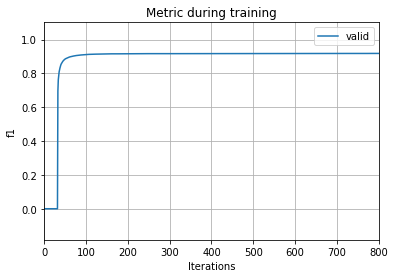

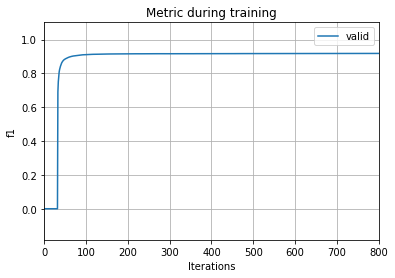

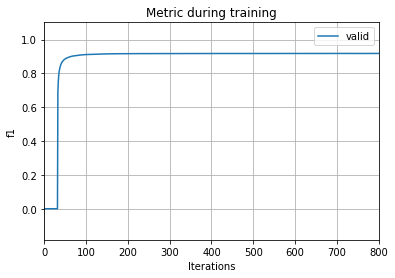

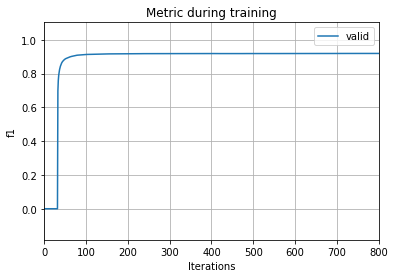

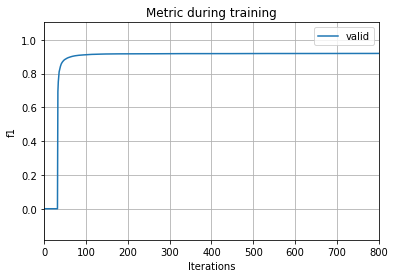

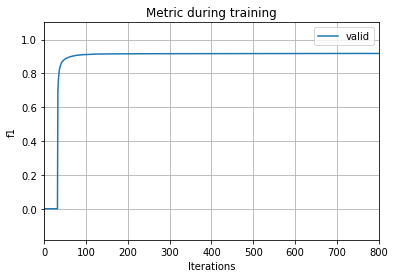

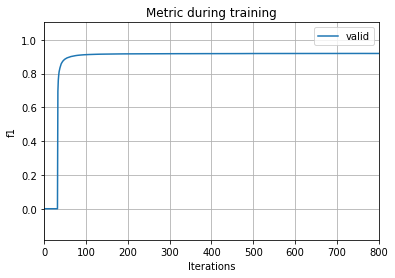

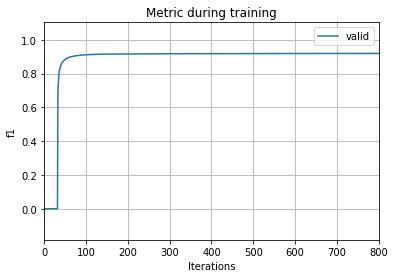

In [20]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from random import randint

# parameters for LightGBMClassifier
params = {
    'objective' :'binary',
    'learning_rate' : 0.01,
    'num_boost_round':800,
    'num_leaves' : 1000,
    'metric': 'binary_logloss',
    'num_threads':8,
    'boosting':'gbdt',
    'categorical_feature':[7,8,17,18,19,25,26,27,28,29,30]
    }


def lgbm_trainder(seed=0):
    
    X_train, X_val, Y_train, Y_val = train_test_split(
    x_train, y_train.y.values, test_size=0.2, random_state=seed)
    
    d_train = lgb.Dataset(X_train, label=Y_train)
    d_valid = lgb.Dataset(X_val, label=Y_val)
    
    def lgb_f1_score(y_hat, data):
        y_true = data.get_label()
        y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
        return 'f1', f1_score(y_true, y_hat), True
    
    #Learning
    evals_result = {}    
    params['seed']=seed
    clf = lgb.train(params, d_train,valid_sets=[d_valid], valid_names=['valid'],feval=lgb_f1_score,evals_result=evals_result)   
    lgb.plot_metric(evals_result, metric='f1')
    
    #Prediction
    target=list(clf.predict(x_test))
    
    return target, f1_score(Y_val,np.round(clf.predict(X_val)))

size = 8

city_lgbm_proba = []
city_lgbm_score = []


seeds = []

for i in range(size):
    s = randint(0,2**32 - 1)
    seeds.append(s)
    proba, score = lgbm_trainder(seed=s)
    city_lgbm_proba.append(proba)
    city_lgbm_score.append(score)
print(seeds)

In [29]:

lgbm=pd.DataFrame()
for i in range(size):
    lgbm[str(i)]=city_lgbm_proba[i]
lgbm.to_csv('./output/10/lgbm.csv',index=False)    
lgbm[:20]

0         1         2         3         4         5         6  \
0   0.009197  0.007501  0.010942  0.008164  0.007065  0.011376  0.008039   
1   0.000850  0.000705  0.000818  0.001374  0.001704  0.000909  0.001287   
2   0.999765  0.999763  0.999766  0.999765  0.999764  0.999760  0.999758   
3   0.003983  0.005294  0.006330  0.007125  0.003623  0.006818  0.004719   
4   0.105342  0.081010  0.073625  0.015483  0.069108  0.059021  0.065238   
5   0.000109  0.000115  0.000116  0.000136  0.000122  0.000125  0.000126   
6   0.999765  0.999764  0.999766  0.999756  0.999764  0.999761  0.999757   
7   0.000101  0.000101  0.000101  0.000104  0.000103  0.000104  0.000108   
8   0.999744  0.999727  0.999729  0.999673  0.999708  0.999712  0.999682   
9   0.222022  0.317563  0.462648  0.241809  0.252408  0.332553  0.429194   
10  0.999765  0.999764  0.999766  0.999754  0.999764  0.999759  0.999756   
11  0.441693  0.483753  0.488697  0.421021  0.443033  0.555311  0.506698   
12  0.037037  0.035465  0.058850  0.034243  0.036212  0.011890  0.030865   
13  0.000661  0.001542  0.001173  0.001354  0.000733  0.001425  0.000841   
14  0.144858  0.157068  0.170222  0.105112  0.107025  0.095239  0.103930   
15  0.290379  0.446767  0.450664  0.310046  0.494026  0.321780  0.327878   
16  0.145815  0.129123  0.219838  0.144646  0.143952  0.229874  0.129110   
17  0.376383  0.391081  0.305380  0.318941  0.425553  0.248108  0.270046   
18  0.000101  0.000102  0.000102  0.000109  0.000103  0.000103  0.000106   
19  0.000102  0.000103  0.000102  0.000110  0.000102  0.000103  0.000106   

           7  
0   0.009844  
1   0.000907  
2   0.999766  
3   0.004076  
4   0.082202  
5   0.000132  
6   0.999766  
7   0.000101  
8   0.999738  
9   0.405568  
10  0.999766  
11  0.468075  
12  0.046709  
13  0.000825  
14  0.199822  
15  0.402947  
16  0.256765  
17  0.395560  
18  0.000101  
19  0.000100

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


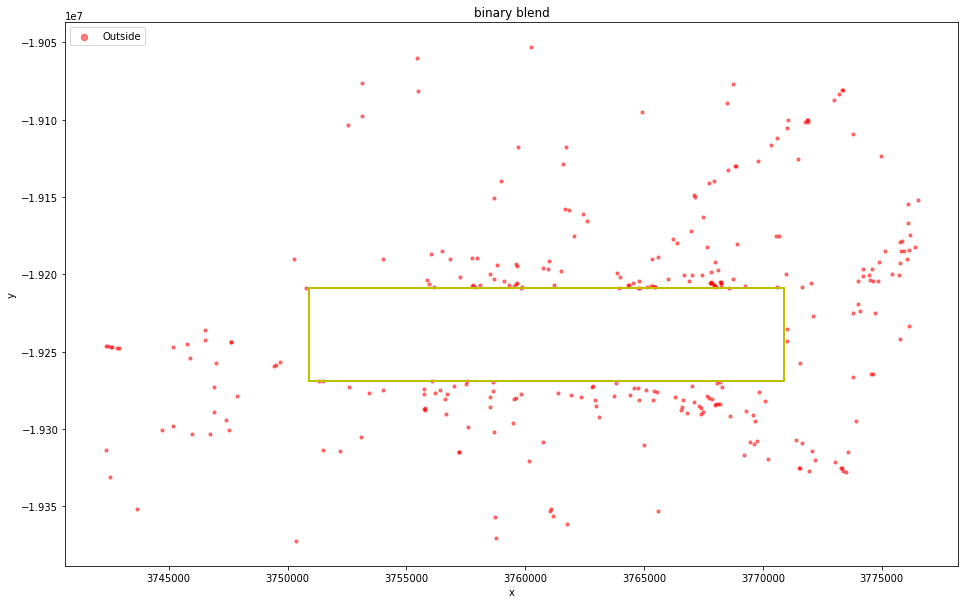

In [41]:

best = pd.read_csv('./output/submission/lgbm_800.csv').target.values
best2 = pd.read_csv('./output/submission/lgbm_blended_2.csv').target.values
city=lgbm.copy()
for col in city.columns:
    city[col]=np.round(city[col].values)
city['best']=best
city['best2']=best2
city['target']=np.zeros(len(city))
for col in city.columns:
    city['target']=city['target']+city[col]

def fnc(x):
    if x>=6:
        return 1
    else:
        return 0
city=[fnc(x) for x in city.target.values]

submission= pd.DataFrame()
submission['id']=test2['trajectory_id']
submission['target'] = city
submission.to_csv('./output/10/blend2_bin6.csv',index=False)    
submission[:20]

plotmap(city,'binary blend')

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


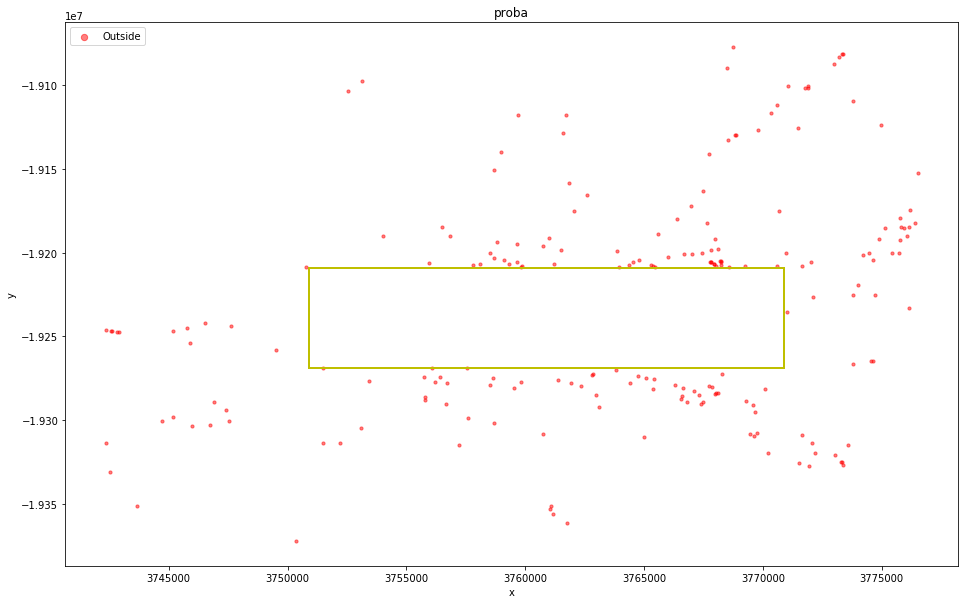

In [23]:
city=lgbm.copy()

target=np.zeros(len(city))
i=0
for col in city.columns:
    target += lgbm[col]
    i += 1
city['target']=target
city['target']/=i

city=np.round(city.target.values)

submission= pd.DataFrame()
submission['id']=test2['trajectory_id']
submission['target'] = city
submission.to_csv('./output/10/proba.csv',index=False)    
submission[:20]

plotmap(city,'proba')

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


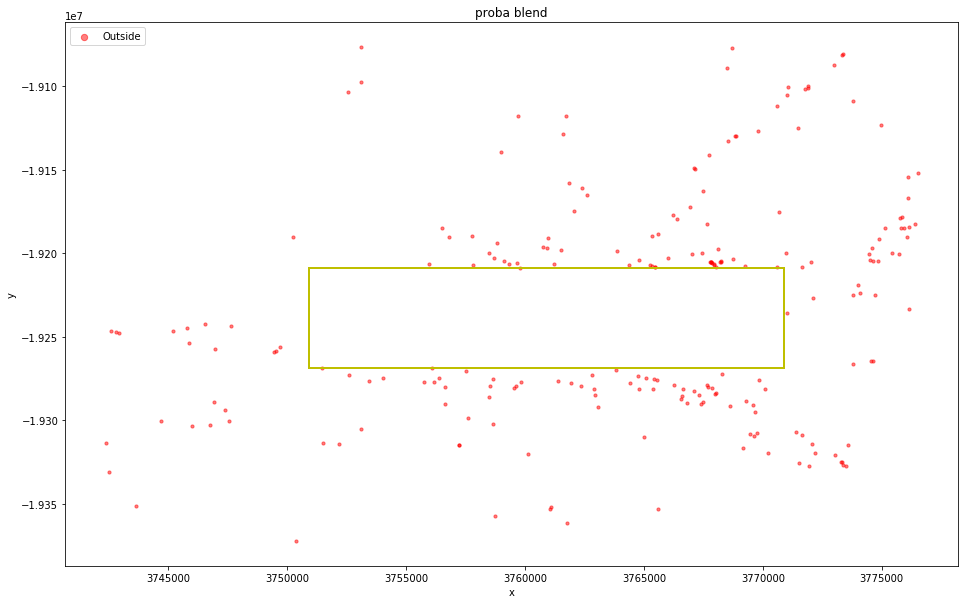

In [24]:
city=lgbm.copy()
target=np.zeros(len(city))
i=0
for col in city.columns:
    target += lgbm[col]
    i += 1
    
target += pd.read_csv('./output/submission/lgbm_blended_2.csv').target.values
i += 1
city['target']=target
city['target']/=i

city=np.round(city.target.values)

submission= pd.DataFrame()
submission['id']=test2['trajectory_id']
submission['target'] = city
submission.to_csv('./output/10/proba_blend.csv',index=False)    
submission[:20]

plotmap(city,'proba blend')